<a href="https://colab.research.google.com/github/deboraaires/analise_Ibovespa/blob/Dados-B3/An%C3%A1lise_do_IBOVESPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Investigação do comportamento do IBOVESPA de 28/04/1993 a 19/11/2020.**

Fonte de dados: 

https://finance.yahoo.com/quote/%5EBVSP/history?period1=735955200&period2=1605916800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true





Crises econômico-financeiras:

*   https://www.bndes.gov.br/SiteBNDES/export/sites/default/bndes_pt/Galerias/Arquivos/conhecimento/td/Td-77.pdf
*   https://www.infoescola.com/economia/crises-economico-financeiras-de-1991-a-2011/
*   https://en.wikipedia.org/wiki/Financial_crisis


*   1992–93 – Black Wednesday – speculative attacks on currencies in the European Exchange Rate Mechanism
*   1994–95 – Mexico Economic crisis in Mexico – speculative attack and default on Mexican debt
*   1997–98 – 1997 Asian Financial Crisis – devaluations and banking crises across Asia
*   1998 - Russia Russian financial crisis
*   2000–2001 – Turkey 2001 Turkish economic crisis
*   2000 – early 2000s recession
*   1999-2002 – Argentina Argentine economic crisis (1999-2002)
*   2001 – Bursting of dot-com bubble – speculations concerning internet companies crashed
*   2008-2011 – Iceland Icelandic financial crisis
*   2007–08 – financial crisis of 2007–2008
*   2008-2014 Spain 2008-2014 Spanish financial crisis
*   2010 European sovereign debt crisis
*   2014 - Russia Russian financial crisis
*   2010-2018 - Greece Greek government-debt crisis
*   2018–present - Turkey Turkish currency and debt crisis, 2018
*   2020–present - 2020 stock market crash (especially the Black Monday and the Black Thursday)


**Importações das bibliotecas:**

In [470]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Carregamento de dados:**

In [471]:
#Base de dados está armazenada no GitHub
caminho = 'https://raw.githubusercontent.com/deboraaires/analise_Ibovespa/main/%5EBVSP.csv'

#Criando um DataFrame em ibovespa
ibovespa = pd.read_csv(caminho,
                    sep=",",
                    decimal=".",
                    engine='python')

#Visualização das 5 primeiras linhas
ibovespa.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0.0
1,1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0.0
2,1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0.0
3,1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0.0
4,1993-05-04,24.100000,25.000000,24.100000,24.900000,24.900000,0.0


**Limpeza de dados:**

In [472]:
#remove valores nulos do conjunto de dados
ibovespa = ibovespa.loc[~ibovespa["Adj Close"].isnull()]

# set_index() seleciona uma coluna para ser o índice do DataFrame
ibovespa = ibovespa.set_index("Date")
ibovespa.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0.0
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0.0
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0.0
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0.0
1993-05-04,24.100000,25.000000,24.100000,24.900000,24.900000,0.0


**Exploração dos dados:**

## Visão do período completo

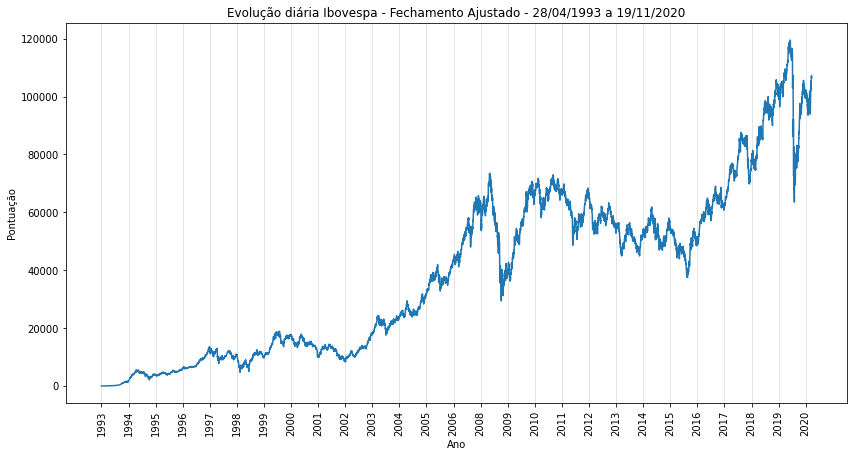

In [473]:
# Visão do período completo
ax = ibovespa["Adj Close"].plot(figsize=(14,7));
plt.title("Evolução diária Ibovespa - Fechamento Ajustado - 28/04/1993 a 19/11/2020");
plt.xlabel("Ano");
plt.ylabel("Pontuação");

# remove os dias e mese no label deixando somente ano
labels = ibovespa.index.str[:4]

#Coloca uma quantidade maior de informações no eixo x e rotaciona 90 graus
ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 260));
ax.set_xticklabels(labels[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 260)]);
plt.xticks(rotation=90);

# adiciona grid para facilitar visualização dos valores das barras
ax.xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.25)


## 1994-1995: Crise econômica do México de 1994

Notícias da época:
*  https://www1.folha.uol.com.br/fsp/1995/11/19/dinheiro/1.html
*  https://pt.wikipedia.org/wiki/Crise_econ%C3%B4mica_do_M%C3%A9xico_de_1994

"Assim, mesmo com todas as proteções garantidas pelo Estado mexicano, os investidores estrangeiros debandavam gradualmente, e assim, os US 25 bilhões de reservas cambiais em moedas fortes que o país possuía no início de 1994 passava, em outubro, para um montante de US 18 bilhões. Mesmo com os tesobonos, as reservas mexicanas diminuíram em mais de um terço de março e setembro. Num esforço desesperado para defender a taxa de câmbio, a administração Salinas esvaziou as reservas de moeda estrangeira, de US 30 bilhões para apenas US 6 bilhões no final de 1994.
Em 20 de dezembro de 1994, apenas três semanas após o início do governo Ernesto Zedillo, o Ministério da Fazenda ampliou a banda cambial em 15,3%. Os investidores entraram em pânico e iniciaram uma corrida ao peso, no dia seguinte, a peg (paridade) foi abandonada e o peso flutuou livremente em relação ao dólar. O valor do peso imediatamente à metade de seu valor nominal, mergulhou o México numa depressão surpreendentemente profunda.
Uma depressão que fez com que em todo o mundo caíssem as cotações dos títulos dos países emergentes."

*  http://memorialdademocracia.com.br/card/crise-do-mexico-traz-impactos-ao-brasil

"A crise teve motivações políticas, como a sucessão presidencial, o assassinato do candidato Luis Colosio e o crescimento das forças zapatistas, mas deveu-se principalmente a fortes desequilíbrios econômicos: déficit na balança de pagamentos, especulação financeira e fuga de capitais.

O atrelamento do peso ao dólar pelo governo Salinas estimulou as importações, produzindo um déficit brutal na balança de pagamentos e a quebra de boa parte da indústria mexicana. Dependendo cada vez mais dos capitais externos e voláteis, o governo mexicano passou a emitir títulos públicos atrelados ao dólar, o que comprometeu gravemente as reservas cambiais."

"A crise econômica do México estoura no final de dezembro de 1994 e agrava-se em janeiro de 1995, afetando outros países da América Latina, inclusive o Brasil, onde o governo do presidente Fernando Henrique Cardoso estava se iniciando."

"Por seu efeito contaminador, a crise mexicana ficou conhecida como Efeito Tequila. Produziu uma desvalorização generalizada dos títulos de países emergentes, especialmente dos latino-americanos."

"o Brasil elevou os juros a estratosféricos 38,7% no ano para atrair e manter os capitais voláteis. "

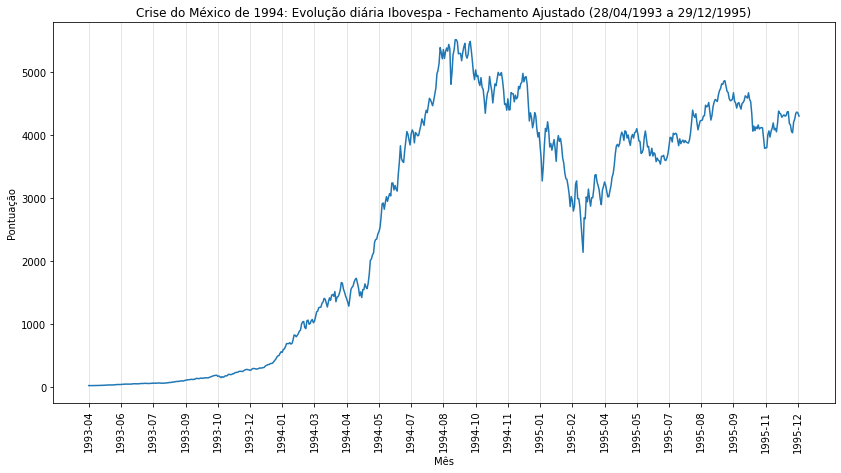

In [474]:
# Visão de 28/04/1993 a 29/12/1995
ax = ibovespa["Adj Close"].loc[:"1995-12-29"].plot(figsize=(14,7));
plt.title("Crise do México de 1994: Evolução diária Ibovespa - Fechamento Ajustado (28/04/1993 a 29/12/1995)");
plt.xlabel("Mês");
plt.ylabel("Pontuação");

# remove os dias no label deixando somente mese-ano
labels = ibovespa.index.str[:7]

#Coloca uma quantidade maior de informações no eixo x e rotaciona 90 graus
ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 30));
ax.set_xticklabels(labels[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 30)]);
plt.xticks(rotation=90);

# adiciona grid para facilitar visualização dos valores das barras
ax.xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.25)


## 1997-1998: Crise Financeira Asiática e Russa

### 1997-1998: Crise Financeira Asiática

Notícias da época:
*   https://pt.wikipedia.org/wiki/Crise_financeira_asi%C3%A1tica_de_1997

"A crise financeira asiática de 1997 foi um período de crise financeira que atingiu grande parte do Sudeste e Oriente asiático a partir de julho de 1997 e levou temores de um colapso econômico mundial devido ao contágio financeiro."

"Os efeitos da crise duraram até 1998."

"Em 1999, porém, os analistas viram sinais de que as economias da Ásia estavam começando a se recuperar."

*   https://en.wikipedia.org/wiki/1997_Asian_financial_crisis
*   https://www.sunoresearch.com.br/artigos/crise-asiatica/

"Em 1997, países do Sudeste e Nordeste asiático enfrentaram crise financeira que desvalorizou fortemente suas moedas, derrubou suas Bolsas de Valores, interrompeu o crescimento econômico e se estendeu ao plano político, com a queda de governos."

"Iniciando-se na Tailândia, na Malásia, na Indonésia e nas Filipinas, suas repercussões adquiriram amplitude global quando incorporou Coréia do Sul e Hong Kong. Uma das causas da crise de confiança foi o endividamento excessivo do setor privado e a incapacidade do setor financeiro de recuperar boa parte dos empréstimos concedidos."

"Brasil

Nos anos 90, no Brasil, as autoridades monetárias deixaram entrar crescentes quantias de capital estrangeiro sem controle, o que aumentou o endividamento externo do país. O déficit em transações correntes era considerado elevado: 3,74% do PIB, o que indicava dependência em relação aos capitais estrangeiros e vulnerabilidade a crises internacionais.
O ataque especulativo levou a um aumento das taxas de juros e de desemprego. A fuga de capitais e a ameaça de colapso cambial, em fins de 1998, levaram o país a emprestar US$ 40 bilhões do FMI para restabelecer o financiamento externo.
O Banco Central interveio nos mercados futuros de dólar para tentar defender o câmbio, gastando reais. Na primeira vez, deu certo. Mas, após a crise da Rússia, em 1998, a tentativa de operar o mercado de câmbio falhou e o país perdeu recursos."

*   https://www1.folha.uol.com.br/fsp/dinheiro/fi2012200604.htm#:~:text=Em%201997%2C%20crise%20na%20%C3%81sia%20atingiu%20emergentes,-DA%20REDA%C3%87%C3%83O&text=Nos%20anos%20seguintes%2C%20contaminou%20outros,financeiros%20das%20economias%20da%20regi%C3%A3o.


"Inicialmente restrita aos conjunto de países conhecidos como tigres asiáticos, a crise asiática rapidamente se espalhou para outros países, afetando economias e mercados do mundo inteiro. Por isso, muitos afiram que essa foi a primeira crise da era da economia globalizada."

"A crise asiática também teve reflexos nas principais potências econômicas mundiais. Diversas ações internacionais caíram em 60%. Além disso, ela afetou países da União Europeia, Estados Unidos e a Rússia.

As consequências da crise asiática também fizeram a economia mundial ficar contida nos anos de 1998 e 1999."

"A crise financeira na Ásia afetou também as finanças da Rússia. O presidente do país na época, Boris Yeltsin chegou a demitir todo o governo. Não muito tempo depois, o rublo russo também entrou em colapso — e logo depois, a Bolsa Russa também entrou em recessão, iniciando a também conhecida crise russa."

"Os impactos da crise asiática também afetaram o Brasil. Logo após uma queda de 10,4% na Bolsa de Hong Kong, os papéis da bolsa brasileira desvalorizaram 8,15% no mesmo dia. O que fez Brasil pedir ajuda ao FMI devido a crise. No total, 41,5 bilhões de dólares foram emprestados."


### 1998: Crise financeira Russa
Notícias da época:

*   http://g1.globo.com/economia/noticia/2014/12/entenda-crise-na-russia-e-possiveis-efeitos-no-brasil.html
*   https://pt.wikipedia.org/wiki/Crise_financeira_na_R%C3%BAssia_em_1998

"Crise russa de 1998, também conhecida como a Moratória russa de 1998, foi a crise que resultou em uma desvalorização do Rublo e na declaração da moratória (interrupção dos pagamentos externos) até a renegociação da dívida externa."

"Em grande medida este processo foi resultado de uma transição acelerada e mal sucedida de uma economia planificada para uma economia de mercado, em meio ao colapso político da União Soviética. A crise da economia planificada soviética tem início nos anos 1970, mas foi "maquiada" com a alta no preço das comodities agrícolas e minerais, especialmente do petróleo, após a crise petrolífera de 1973 e a crise petrolífera de 1979-1980. Estes produtos eram exportados em grande quantidade pela então URSS, que também havia aumentado as exportações militares aos países do Terceiro Mundo. Com uma economia aquecida e excesso de moedas fortes nas contas do país, os efeitos negativos da economia planificada não eram percebidos como sérios. Entretanto, a queda no preço das commodities agrícolas, minerais e energéticas (petróleo, gás natural) a partir de 1984-1985, deixou claro os limites daquele modelo. A Perestroika era um plano ousado para realizar uma transição controlada para uma economia de mercado, que fracassou devido ao colapso econômico do país ainda nos anos 1980.

A crise econômica foi agravada pelo colapso político da URSS e a desintegração territorial da União Soviética em 1991. "

"Em 1997, a Crise financeira asiática piorou sensivelmente a situação da Rússia, basicamente devido à redução da oferta de crédito internacional e à queda no preço das commodities (agrícolas, minerais e energéticas) exportadas pela Rússia."

*   https://mundoeducacao.uol.com.br/historiageral/crise-russa.htm

"Com a queda da receita das exportações e a paridade do rublo com o dólar, a dívida russa tornou-se difícil de ser paga."

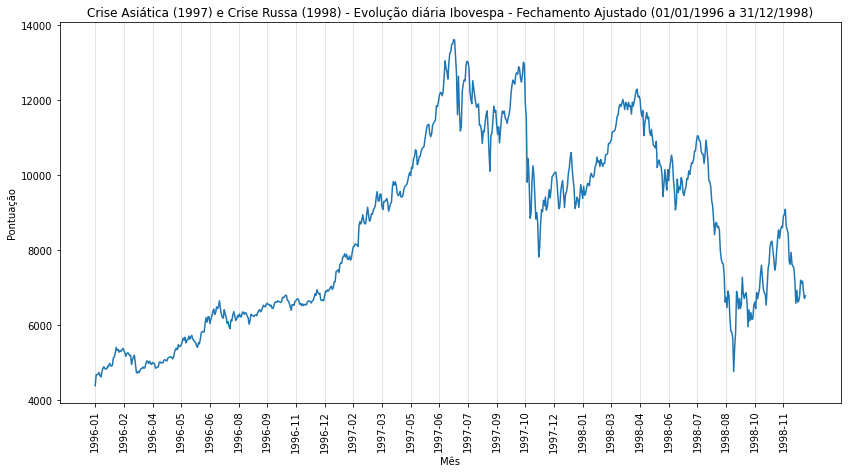

In [475]:
# Visão de 01/01/1996 a 31/12/1998
ax = ibovespa["Adj Close"].loc["1996-01-01":"1998-12-31"].plot(figsize=(14,7));
plt.title("Crise Asiática (1997) e Crise Russa (1998) - Evolução diária Ibovespa - Fechamento Ajustado (01/01/1996 a 31/12/1998)");
plt.xlabel("Mês");
plt.ylabel("Pontuação");

# remove os dias e mese no label deixando somente ano
labels = ibovespa.loc["1996-01-01":"1998-12-31"].index.str[:7]

#Coloca uma quantidade maior de informações no eixo x e rotaciona 90 graus
ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 30));
ax.set_xticklabels(labels[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 30)]);
plt.xticks(rotation=90);

# adiciona grid para facilitar visualização dos valores das barras
ax.xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.25)

## A crise da desvalorização do real em 1999
Notícias da época:

*   https://wp.ufpel.edu.br/ppgom/files/2017/06/monicaremde.pdf
*   https://pt.wikipedia.org/wiki/Desvaloriza%C3%A7%C3%A3o_do_real_em_1999#:~:text=A%20crise%20da%20desvaloriza%C3%A7%C3%A3o%20do,em%20regime%20de%20c%C3%A2mbio%20flutuante.

"A crise da desvalorização do real em 1999, ou efeito samba, foi um forte movimento de queda do real que ocorreu no Brasil em janeiro de 1999, quando o Banco Central abandonou o regime de Bandas Cambiais, passando a operar em regime de câmbio flutuante."

"O Plano Real foi bem sucedido em controlar a inflação ainda em 1994. Entretanto, a implementação de políticas econômicas deflacionistas (juros elevados, baixo investimento estatal), associadas a um câmbio semi-fixo sobrevalorizado, gerou, ao longo dos anos, um grave acúmulo de problemas econômicos estruturais."

"Para manter este sistema funcionando por mais tempo foi necessário injetar algumas dezenas de bilhões de dólares na manutenção do câmbio semi-fixo e das altas taxas de juros."

" Por fim, mesmo com o cortes de despesas públicas e o aumento da carga tributária, que possibilitaram superávits primários, a dívida externa e a dívida pública continuaram a crescer. [4]
A Crise asiática de 1997, seguida da Crise russa de 1998 apenas aceleram as tendências, já que provocaram uma brusca queda no preço das commodities exportadas pelo Brasil e reduziram o crédito externo, dificultando a captação de dólares no exterior. Isto inviabilizou a manutenção de um câmbio sobrevalorizado como era o brasileiro até então. Os recursos obtidos internamente, com as privatizações, não eram mais suficientes e os juros elevados além de inviabilizar o crescimento interno, não atraíam mais capitais internacionais. O choque de preços no exterior fez esse desequilíbrio se tornar ainda maior.[5] Após as eleições de 1998, o governo brasileiro iniciou os preparativos para a desvalorização da moeda doméstica, que ocorreria na segunda quinzena de janeiro de 1999."

"Foram muitas as consequências da desvalorização do Real em 1999, algumas positivas outras negativas. A primeira consequência positiva foi o fim do incessante escoamento de dólares das contas externas brasileiras, gastos para manter o real sobrevalorizado. Associado a isto, o Brasil teve uma redução do déficit na balança de pagamentos e o crescimento da dívida pública foi controlado. Entretanto, a carga tributária cresceu entre 1999 e 2002, passando da faixa de 25% para 37%.[7]

Dentre as consequências políticas, destaca-se o início da crise política do governo Fernando Henrique Cardoso que sustentava o discurso da estabilidade econômica na estabilidade do Real.[1]

Houve uma série de consequências econômicas, como o aumento da inflação (o IGP-M passou de 1,79% em 1998 para 20,10% em 1999), a redução do deficit da balança comercial (de US 6,5 bilhões em 1998 para US 1,2 bilhão em 1999 e US$ 0,7 bilhão em 2000). Alem disto, houve uma redução dos juros, de 41% ao ano em janeiro de 1999 para 19% em dezembro de 1999."

"Entretanto, a desvalorização aumentou as receitas para a maior parte dos setores produtivos e exportadores do Brasil, tanto na agricultura, pecuária e extrativismo como nos setores industriais. Além de facilitar as exportações, a redução das importações ajudou a reaquecer a indústria nacional. Assim, diferentemente de outras crises dos anos 1990, a desvalorização do Real em 1999 acabou se mostrando, no prazo de alguns anos, positiva para a economia brasileira."

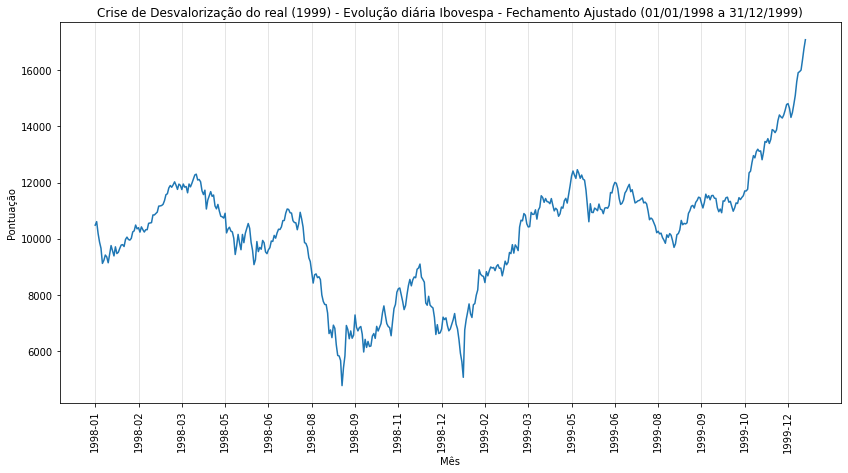

In [476]:
# Visão de 01/01/1998 a 31/12/1999
ax = ibovespa["Adj Close"].loc["1998-01-01":"1999-12-31"].plot(figsize=(14,7));
plt.title("Crise de Desvalorização do real (1999) - Evolução diária Ibovespa - Fechamento Ajustado (01/01/1998 a 31/12/1999)");
plt.xlabel("Mês");
plt.ylabel("Pontuação");

# remove os dias e mese no label deixando somente ano
labels = ibovespa.loc["1998-01-01":"1999-12-31"].index.str[:7]

#Coloca uma quantidade maior de informações no eixo x e rotaciona 90 graus
ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 30));
ax.set_xticklabels(labels[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 30)]);
plt.xticks(rotation=90);

# adiciona grid para facilitar visualização dos valores das barras
ax.xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.25)

## 2000: Bolha "ponto com"

Notícias da época:

*   https://www.infomoney.com.br/mercados/ha-13-anos-bolha-da-internet-comecava-a-explodir-nos-eua-veja-como-foi/

"A formação da bolha das empresas de informática se deu entre os anos de 1995 e 2000."

"De acordo com muitos especialistas de mercado, a corrupção corporativa foi um dos principais motivos para o acidente ocorrer, uma vez que muitas empresas envolveram-se em fraudes, com falhas graves e dívidas “maquiadas” no balanço."

"Entre outros fatores apontados para o estouro da bolha, estiveram ainda os altos gastos para a transição para a virada do milênio: uma vez que as empresas já possuiam os equipamentos necessários, elas pararam de gastar com eles. Por fim, tiveram também os maus resultados das varejistas online na temporada de Natal de 1999 e que foram divulgados somente em março, apontando que muitos cases não eram tão atrativos quanto mostrados inicialmente. 

Assim, após fechar a 5.048,62 pontos no dia 10 de março, a bolsa eletrônica não parou mais de cair, mesmo que aos poucos. Naquela sessão, ela registrou queda de 4% e, desde então, chegou a perder 75% do valor até o final de 2000."

"O clímax – e a posterior queda – deste período se deu no dia 10 de março de 2000, quando o índice Nasdaq – a bolsa eletrônica dos EUA – chegou a 5.132,52 pontos, sua máxima histórica."

*   https://pt.wikipedia.org/wiki/Bolha_da_Internet#:~:text=O%20estouro%20da%20bolha%20das,valor%20em%20apenas%20um%20ano.

"A bolha da Internet ou bolha das empresas ponto com[1] foi uma bolha especulativa que ocorreu aproximadamente de 1994 até 2000, caracterizada por uma forte alta das ações das novas empresas de tecnologia da informação e comunicação (TIC) baseadas na Internet."

"O estouro da bolha das "ponto com", deu-se em 10 de março de 2000, quando o índice de tecnologia pesada Nasdaq Composite chegou a 5,048.62 (intra-dia 5,132.52), mais que o dobro do seu valor em apenas um ano."

*   https://www.sunoresearch.com.br/artigos/bolha-da-internet/
*   https://www.tecmundo.com.br/mercado/124475-historia-estouro-bolha-da-internet-ano-2000-video.htm

**2001-2002: Crise econômica da Argentina:**
*   https://pt.wikipedia.org/wiki/Crise_econ%C3%B4mica_argentina_(1998-2002)

"A crise econômica argentina foi uma crise financeira que afetou a economia argentina durante a década de 1990 e início da década de 2000. Macroeconomicamente falando, o período crítico começou com a queda do PIB real em 1999 e terminou em 2002 com o retorno do crescimento do PIB, mas as origens do colapso da economia argentina e seus efeitos sobre a população, podem ser encontradas em ações anteriores."
*   https://pt.wikipedia.org/wiki/Desvaloriza%C3%A7%C3%A3o_do_real_em_1999#:~:text=A%20crise%20da%20desvaloriza%C3%A7%C3%A3o%20do,em%20regime%20de%20c%C3%A2mbio%20flutuante

"Este processo, ao longo do período 1999-2000 agravou a situação das contas externas argentinas, e acelerou a pressão pela desvalorização cambial e a desdolarização da economia argentina. As opções discutidas na Argentina, à época, eram basicamente: desvalorizar o câmbio ou deixar o Mercosul. A crise econômica global de 2000-2001, marcada pela falência da Enron e a crise na bolsa de valores da Nasdaq nos EUA, agravou a situação da Argentina, que foi obrigada a desvalorizar o câmbio em 2001. A Crise econômica da Argentina foi considerada por muitos analistas um teste de fogo para o Mercosul."

**2000-2001: Crise turca:**
*   https://www1.folha.uol.com.br/fsp/dinheiro/fi2911200026.htm

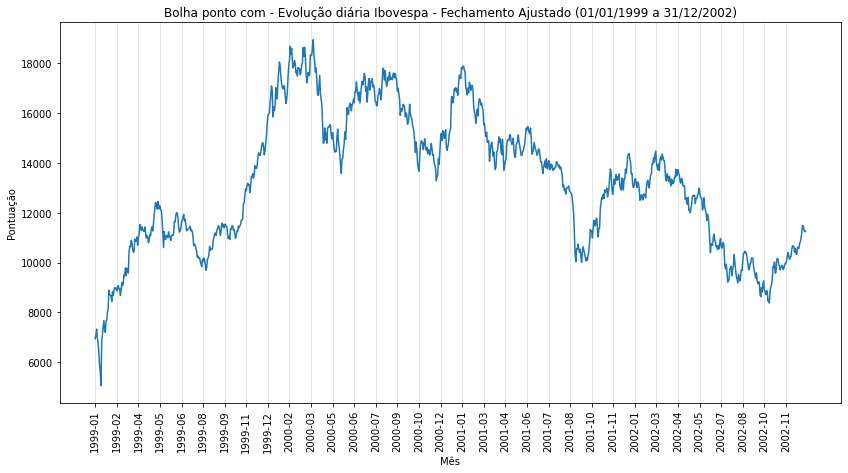

In [477]:
# Visão de 01/01/1999 a 31/12/2002
ax = ibovespa["Adj Close"].loc["1999-01-01":"2002-12-31"].plot(figsize=(14,7));
plt.title("Bolha ponto com - Evolução diária Ibovespa - Fechamento Ajustado (01/01/1999 a 31/12/2002)");
plt.xlabel("Mês");
plt.ylabel("Pontuação");

# remove os dias e mese no label deixando somente ano
labels = ibovespa.loc["1999-01-01":"2002-12-31"].index.str[:7]

#Coloca uma quantidade maior de informações no eixo x e rotaciona 90 graus
ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 30));
ax.set_xticklabels(labels[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 30)]);
plt.xticks(rotation=90);

# adiciona grid para facilitar visualização dos valores das barras
ax.xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.25)

# Organizando dados de fechamento diários para 100 ações de 1994-2006

Esta é uma continuação de um estudo que foi realizado para 100 empresas de 2007 a 2011, as quais não ficaram 5 dias seguidos ou mais sem participações em pregões durante todo o período (consideranto a fonte de dados do Yahoo Finanças). Agora o que se objetiva é estudar um período anterior a este, analizando as crises no contexto brasileiro a partir da criação do plano real.

**Histórico das empresas estudadas**

(existem ações dentre as 100 selecionadas que pertencem a uma mesma empresa)

Ambev S.A.
*   Fundação	1 de julho de 1999 
*   Fusão entre as então concorrentes Companhia Antarctica Paulista e a Companhia Cervejaria Brahma
*   https://pt.wikipedia.org/wiki/AMBEV

Alpargatas S.A.
*   Fundação	3 de abril de 1907
*   https://pt.wikipedia.org/wiki/Alpargatas_S.A.

Banco da Amazônia S.A.
*   Fundação	9 de julho de 1942
*   https://pt.wikipedia.org/wiki/Banco_da_Amaz%C3%B4nia

Banco do Brasil S.A.
*  Fundação	12 de outubro de 1808
*  https://pt.wikipedia.org/wiki/Banco_do_Brasil

Banestes S.A - Banco do Estado do Espírito Santo
*  Fundação	15 de outubro de 1937
*  https://pt.wikipedia.org/wiki/Banco_do_Estado_do_Esp%C3%ADrito_Santo

Bicicletas Monark S.A.
*  Fundação	1948
*  https://pt.wikipedia.org/wiki/Monark

Bradespar S.A.
*  Fundação	30 de março de 2000
*  A partir de um desmembramento do Banco Bradesco
*  https://pt.wikipedia.org/wiki/Bradespar

Braskem S.A.
*  Fundação	16 de agosto de 2002
*  A partir da integração das empresas Copene, OPP, Trikem, Proppet, Nitrocarbono e Polialden, do Grupo Odebrecht.
>*  https://www.braskem.com.br/RI/detalhe-comunicados-e-fatos-relevantes/incorporacao-da-nitrocarbono
> *  https://www.braskem.com.br/RI/detalhe-comunicados-e-fatos-relevantes/incorporacao-da-copene
> *  https://www.braskem.com.br/RI/detalhe-comunicados-e-fatos-relevantes/braskem-incorpora-a-polialden
*  https://pt.wikipedia.org/wiki/Braskem

B2W - Companhia Digital
*  Fundação	13 de dezembro de 2006
*  Fusão entre Submarino, Shoptime, Americanas.com
*  As Lojas Americanas possuem o controle acionário do grupo
*  https://pt.wikipedia.org/wiki/B2W_Digital

CSU Cardsystem S.A.
*  Fundação: 1992
*  https://www.csu.com.br/sobre-a-csu/a-companhia/historico/

Ampla Energia e Serviços S.A.
*  Fundação: 1908
*  https://www.enel.com.br/pt.html

Cyrela Commercial Properties S.A.
*  Fundação	1962
*  https://pt.wikipedia.org/wiki/Cyrela

CCR S.A.
*  Fundação	23 de janeiro de 1999
*  antiga Companhia de Concessões Rodoviárias
*  a partir da unificação de ações detidas por grandes grupos nacionais: Grupo Andrade Gutierrez (que detém 17% das ações), Grupo Camargo Corrêa (que detém 17% das ações), Grupo Soares Penido (que detém 17,22% das ações), com o restante (48,78% das ações) negociados no Novo Mercado da BM&FBovespa.
*  https://pt.wikipedia.org/wiki/Grupo_CCR

CESP - Companhia Energética de São Paulo
*  Fundação	5 de dezembro de 1966
*  https://pt.wikipedia.org/wiki/Companhia_Energ%C3%A9tica_de_S%C3%A3o_Paulo

Companhia de Gás de São Paulo - COMGAS
*  Fundação	1872
*  https://pt.wikipedia.org/wiki/Comg%C3%A1s

Companhia Energética de Minas Gerais - CEMIG
*  Fundação	1952
*  https://pt.wikipedia.org/wiki/Companhia_Energ%C3%A9tica_de_Minas_Gerais

Companhia Energética do Ceara - COELCE
*  Fundação	30 de agosto de 1971
*  https://pt.wikipedia.org/wiki/Enel_Distribui%C3%A7%C3%A3o_Cear%C3%A1

CPFL Energia S.A.
*  Fundação	16 de novembro de 1912
*  https://pt.wikipedia.org/wiki/CPFL_Energia

Companhia Paranaense de Energia - COPEL
*  Fundação	26 de outubro de 1954
*  https://pt.wikipedia.org/wiki/Companhia_Paranaense_de_Energia

Financeira Alfa S.A.
*  Em 1998, parte da estrutura do Grupo Real foi vendido para o banco holandês ABN AMRO Bank. As empresas financeiras que faziam parte do Grupo Real, como o Banco Real de Investimento, a Companhia Real de Investimento - CFI, a Companhia Real de Arrendamento Mercantil, Companhia Real Corretora de Câmbio e Valores Imobiliários não foram vendidas e deram origem ao Conglomerado Financeiro Alfa.
*  O Conglomerado Financeiro Alfa é composto por 6 empresas, o Banco Alfa de Investimento S.A., a Alfa Corretora de Câmbio e Valores Imobiliários S.A, a Alfa Arrendamento Mercantil S.A., a Financeira Alfa S.A. e a BRI Participações S.A.
*  https://pt.wikipedia.org/wiki/Conglomerado_Alfa
*  https://bancoalfa.com.br/sobreoalfa/home/historia.ashx
*  O Conglomerado Financeiro Alfa teve início em 1925, com a Fundação do Banco da Lavoura de Minas Gerais. Em 1972, o Banco da Lavoura alterou sua denominação para Banco Real S/A e posteriormente criou outras empresas financeiras que constituiriam o Conglomerado Financeiro Real. Em 1998, o Banco Real S/A teve seu controle acionário vendido ao ABN Amro Bank
*  http://memoria.bn.br/DocReader/Hotpage/HotpageBN.aspx?bib=089842_08&pagfis=37693&url=http://memoria.bn.br/docreader#

Cosan S.A.
*  Fundação	1936
*  usina Costa Pinto, em Piracicaba, foi comprada pelos irmãos Pedro Ometto e João Ometto, e o sócio Mário Dedini em 1936.[16] O grupo Pedro Ometto, sob lideração de Pedro Ometto, cresceu. Em 1949 fundou a usina da Barra, a maior de todas, administrada por Orlando Chesini Ometto.[17]
Orlando, filho de Pedro, junto com sua irmã Isaltina Ometto Silveira Mello, controlou o grupo Ometto pela holding Aguassanta. Em 1989 o grupo era o maior produtor de açúcar e álcool do mundo com vinte duas empresas e moagem de 10,5 milhões de toneladas de cana-de-açúcar, 5% do total brasileiro.[18]
Em 1986, Rubens Ometto Silveira Mello começou a trabalhar para o grupo Pedro Ometto. Era o responsável pelas usinas de Costa Pinto e Santa Bárbara,[19] essa última desativada em 1995.
Também em 1986 comprou o controle do grupo Bom Jesus que incluía as usinas de Santa Helena, São Francisco e Ipaussu,[19] formando o grupo Cosan/BJ.
*  https://pt.wikipedia.org/wiki/Cosan

Companhia de Saneamento de Minas Gerais - COPASA MG
*  Fundação	1963
*  https://pt.wikipedia.org/wiki/Companhia_de_Saneamento_de_Minas_Gerais

Companhia Siderúrgica Nacional - CSN
*  Fundação	9 de abril de 1941
*  https://pt.wikipedia.org/wiki/Companhia_Sider%C3%BArgica_Nacional

Companhia de Tecidos Norte de Minas - COTEMINAS
*  Fundação	1967
*  https://pt.wikipedia.org/wiki/Coteminas

Companhia Tecidos Santanense Ltda
*  Fundação: 1891
*  http://www.santanense.com.br/empresa/historia.html

DTCOM - Direct to Company S.A.
*  Fundação: 1999
*  https://dtcom.com.br/a-dtcom/

Electro Aço Altona S.A.
*  Fundação: 1933
*  http://www2.altona.com.br/web/quem-somos/nossa-historia
*  surgiu a Auerbach & Werner em 08 de março de 1924.
Partindo de utensílios domésticos e agrícolas, a empresa cresceu, incorporando o aço em 1933 com o nome Electro Aço Altona S.A

Centrais Eletricas Brasileiras S.A. - Eletrobras
*  Fundação	11 de junho de 1962
*  https://pt.wikipedia.org/wiki/Eletrobras

Empresa Metropolitana de Águas e Energia S.A. - EMAE
*  Fundação	1998
*  https://pt.wikipedia.org/wiki/Empresa_Metropolitana_de_%C3%81guas_e_Energia
*  a partir da cisão da antiga estatal Eletropaulo. Além desta, que continuou sendo estatal, foram criadas (e posteriormente privatizadas) as empresas abaixo citadas.
>Eletropaulo Metropolitana: posteriormente conhecida como AES Eletropaulo (privatizada em 1999)[7] e atualmente com o nome de Enel Distribuição São Paulo (desde 3 de dezembro de 2018),[8] responsável pela operação de energia elétrica na capital paulista e em sua região metropolitana;
Empresa Bandeirante de Eletricidade: chamada anteriormente como EDP Bandeirante (privatizada em 1998),[9] sendo nomeada atualmente como EDP São Paulo, cuja responsabilidade está na operação de energia elétrica em parte das regiões metropolitanas de São Paulo e do Vale do Paraíba e Litoral Norte;
Empresa Paulista de Transmissão de Energia: conhecida atualmente apenas como Transmissão Paulista (privatizada em 2006).[10]

Embraer S.A.
*  Fundação	19 de agosto de 1969
*  https://pt.wikipedia.org/wiki/Embraer

EDP - Energias do Brasil S.A.
*  Fundação	2 de agosto de 2000
*  https://pt.wikipedia.org/wiki/EDP_Brasil

Eternit S.A.
*  Fundação: 1940
*  https://www.eternit.com.br/institucional/#sobre-a-eternit

Cia de Ferro Ligas da Bahia - FERBASA
*  Fundação: 1961
*  http://www.ferbasa.com.br/conteudo_pti.asp?idioma=0&conta=45&tipo=56164

Gafisa S.A.
*  Fundação	1954
*  https://pt.wikipedia.org/wiki/Gafisa

Gerdau S.A.
*  Fundação	16 de janeiro de 1901
*  https://pt.wikipedia.org/wiki/Gerdau

Metalurgica Gerdau S.A.
*  https://pt.wikipedia.org/wiki/Metal%C3%BArgica_Gerdau

Gol Linhas Aereas Inteligentes S.A.
*  Fundada em	15 de janeiro de 2001
*  https://pt.wikipedia.org/wiki/Gol_Linhas_A%C3%A9reas_Inteligentes

GPC Participacoes S.A.
*  Fundação: 1929
*  https://www.gpc.com.br/a-companhia/historico-do-acionista-controlador/

GP Investments, Ltd.
*  Fundação	1993
*  https://pt.wikipedia.org/wiki/GP_Investments

Grendene S.A.
*  Fundação	25 de fevereiro de 1971
*  https://pt.wikipedia.org/wiki/Grendene

Guararapes Confeccoes S.A.
*  Fundação	1956
*  https://pt.wikipedia.org/wiki/Grupo_Guararapes

HAGA S/A Industria e Comercio
*  Fundação: 1937
*  https://www.haga.com.br/?item=historia

Cia. Hering
*  Fundação	1880
*  https://pt.wikipedia.org/wiki/Companhia_Hering

Ideiasnet S.A.
*  Fundação: 1998
*  A Padtec Holding S.A. (B3: PDTC3), antiga Ideiasnet S.A., iniciou suas operações como empresa de investimentos em projetos de Internet em 2000, ano em que abriu seu capital na B3.
*  https://www.padtec.com.br/investor/padtec-holding/

IGB Eletronica S.A. - Gradiente
*  Fundação	1964
*  https://pt.wikipedia.org/wiki/Gradiente_(empresa)

Inepar S.A. Industria e Construcoes
*  Fundação	1953
*  https://pt.wikipedia.org/wiki/Grupo_Inepar

Itausa - Investimentos Itau S.A. 
*  Fundação	6 de maio de 1966
*  https://pt.wikipedia.org/wiki/Ita%C3%BAsa

Itau Unibanco Holding S.A.
*  Fundação	4 de novembro de 2008
*  https://pt.wikipedia.org/wiki/Ita%C3%BA_Unibanco
*  O Banco Itaú S.A. propriamente dito foi fundado em 1944, na cidade de Itaú de Minas, Minas Gerais, e viria a se unir com o Banco Federal de Crédito em 1964, originando o Banco Federal Itaú SA. No dia 4 de novembro de 2008, o Banco Itaú e o Unibanco anunciaram a fusão que deu origem ao Banco Itaú Unibanco. 

Industrias J.B. Duarte S.A.
*  Fundação: 1914
*  http://www.industriasjbduarte.com.br/quem-somos/

Joao Fortes Engenharia S.A.
*  Fundação: 1950
*  http://www.joaofortes.com.br/institucional/historia.aspx

Kepler Weber S.A.
*  Fundação: 1925
*  https://www.kepler.com.br/a-kepler/sobre-a-kepler

Lojas Americanas S.A.
*  Fundação	3 de setembro de 1929
*  https://pt.wikipedia.org/wiki/Lojas_Americanas

Light S.A.
*  Fundação	30 de maio de 1905
*  https://pt.wikipedia.org/wiki/Light_S.A.

LPS Brasil - Consultoria de Imoveis S.A. (LPSB3.SA)
*  Fundação: 1935
*  https://ri.lopes.com.br/show.aspx?idCanal=CzBbfspg5ckMYH7ffHwDTg==

Lojas Renner S.A.
*  Fundação	1912
*  https://pt.wikipedia.org/wiki/Lojas_Renner

M. Dias Branco S.A. Industria e Comercio de Alimentos
*  Fundação	1936
*  https://pt.wikipedia.org/wiki/M._Dias_Branco

Mangels Industrial S.A.
*  Fundação: 1928
*  https://pt.wikipedia.org/wiki/Mangels

MMX Mineracao e Metalicos S.A.
*  Fundação	05 de dezembro de 2005
*  https://pt.wikipedia.org/wiki/MMX_Minera%C3%A7%C3%A3o

Minupar Participacoes S.A. 
*  Fundação: 1984
*  https://www.minupar.com.br/quem-somos

Iochpe-Maxion S.A.
*  Criação	1918
*  https://pt.wikipedia.org/wiki/Iochpe-Maxion

NATURA COSMETICOS S.A.
*  Fundação	1969
*  https://pt.wikipedia.org/wiki/Natura

Odontoprev S.A.
*  Fundação	1987
*  https://pt.wikipedia.org/wiki/Odontoprev

Petroleo Brasileiro S.A. - Petrobras
*  Fundação	3 de outubro de 1953
*  https://pt.wikipedia.org/wiki/Petrobras

Profarma Distribuidora de Produtos Farmaceuticos S.A.
*  Fundação: 1961
*  https://www.profarma.com.br/pt/grupo-profarma#linha-do-tempo

Paranapanema S.A.
*  Fundação: 1961
*  https://www.paranapanema.com.br/show.aspx?idCanal=1NTD1upE0zLybLpflICJng==

Marcopolo S.A.
*  Fundação	6 de agosto de 1949
*  https://pt.wikipedia.org/wiki/Marcopolo

Positivo Tecnologia S.A.
*  Fundação: maio de 1989
*  https://pt.wikipedia.org/wiki/Positivo_Tecnologia

Porto Seguro S.A.
*  Fundação: 1945
*  https://pt.wikipedia.org/wiki/Porto_Seguro_Seguros

PBG S.A. - Portobello S.A.
*  Fundação	1979
*  https://pt.wikipedia.org/wiki/Portobello_S.A.

Raia Drogasil S.A.
*  Fundação: 10 de novembro de 2011
*  https://pt.wikipedia.org/wiki/RaiaDrogasil
*  Droga Raia e Drogasil anunciam a fusão de suas operações, que culminou com a criação da Raia Drogasil S.A.

Randon S.A. Implementos e Participações
*  Fundação	1949
*  https://pt.wikipedia.org/wiki/Randon

Recrusul S/A
*  Fundação: 1954
*  https://www.recrusul.com.br/historia/pt

Localiza Rent a Car S.A.
*  Fundação	1973
*  https://pt.wikipedia.org/wiki/Localiza_Hertz
*  A empresa abriu o seu capital na Bovespa em 20 de maio de 2005

Industrias Romi S.A.
*  Fundação	1930
*  https://pt.wikipedia.org/wiki/Ind%C3%BAstrias_Romi_S.A.

Rossi Residencial S.A.
*  Fundação	27 de outubro de 1980
*  https://pt.wikipedia.org/wiki/Rossi_Residencial

Banco Santander (Brasil) S.A.
*  Fundação	1982
*  https://pt.wikipedia.org/wiki/Banco_Santander_(Brasil)

Companhia de Saneamento Básico do Estado de São Paulo - SABESP
*  Fundação	29 de junho de 1973
*  https://pt.wikipedia.org/wiki/Companhia_de_Saneamento_B%C3%A1sico_do_Estado_de_S%C3%A3o_Paulo

São Carlos Empreendimentos e Participações S.A.
*  Fundação: 1985
*  http://www.scsa.com.br/linha-do-tempo/
*  iniciou suas operações em 1989, como controlada da varejista Lojas Americanas S.A. Em 1999 houve a cisão dos ativos imobiliários da Lojas Americanas e a criação da São Carlos Empreendimentos e Participações S.A.

Schulz S.A.
*  Fundação: 1963
*  https://www.schulz.com.br/historia/

Saraiva S.A. Livreiros Editores
*  Fundação: 1914
*  http://www.saraivari.com.br/conteudo_pt.asp?idioma=0&conta=28&tipo=49680

Sansuy S.A.
*  Fundação: 1966
*  https://sansuy.com.br/sansuy/

Springer S/A
*   Fundação: 1934
*   http://www.springergroup.com.br/

Telecomunicacoes Brasileiras S.A. - TELEBRAS
*   Fundação: 1972
*   https://pt.wikipedia.org/wiki/Telecomunica%C3%A7%C3%B5es_Brasileiras_S.A.

TOTVS S.A.
*   Fundação	1983
*   https://pt.wikipedia.org/wiki/Totvs
*   inicialmente formada a partir da fusão das empresas Microsiga e Logocenter. Após a abertura de capital na BOVESPA, em 08/mar/2006[4], a empresa incorporou seus principais concorrentes nacionais — a RM Sistemas, ainda em 2006, e a Datasul, em 2008.
*   A Microsiga fundiu-se com a Siga em 1989, e em 2005 a empresa mudou o nome para Totvs.

CTEEP - Companhia de Transmissao de Energia Eletrica Paulista S.A.
*   Fundação: 1999
*   https://pt.wikipedia.org/wiki/ISA_CTEEP
*   após da divisão dos ativos da estatal paulista Companhia Energética de São Paulo (CESP), dentro do programa de privatização do governo estadual. Em 2001, a CTEEP incorporou a Empresa Paulista de Transmissão de Energia Elétrica (EPTE), resultante do desmembramento da Eletropaulo.

Unipar Carbocloro S.A.
*   Fundação: 1969
*   https://pt.wikipedia.org/wiki/Unipar_Carbocloro

Usinas Siderúrgicas de Minas Gerais S.A. - Usiminas
*   Fundação: 25 de abril de 1956
*   https://pt.wikipedia.org/wiki/Usiminas

Vale S.A.
*   Fundação: 1 de junho de 1942
*   https://pt.wikipedia.org/wiki/Vale_S.A.
*   até 2007 Companhia Vale do Rio Doce - CVRD

Whirlpool S.A.
*   Fundação: 1911
*   https://pt.wikipedia.org/wiki/Whirlpool_S/A
*   resultado da fusão entre a Multibrás e a Embraco ocorrida em 2006

**Carregando dados descritivos das 100 empresas selecionadas para análise:**

In [478]:
#Base de dados está armazenada no GitHub
caminho = "https://raw.githubusercontent.com/deboraaires/analise_Ibovespa/main/Nomes_100_empresas_setor_ingles.csv"

#Criando um DataFrame em Empresas100
Empresas100 = pd.read_csv(caminho,
                    encoding="ISO-8859-1", 
                    sep=";",
                    engine='python')

#Visualização das 5 primeiras linhas
Empresas100.head()

,Symbol,Sector,Industry,Enterprise Name
0,ABEV3,Consumer Defensive,Beverages/Brewers,Ambev S.A.
1,ALPA3,Consumer Cyclical,Footwear & Accessories,Alpargatas S.A.
2,BAZA3,Financial Services,Banks/Regional,Banco da Amazônia S.A.
3,BBAS3,Financial Services,Banks/Regional,Banco do Brasil S.A.
4,BEES3,Financial Services,Banks/Regional,Banestes S.A - Banco do Estado do Espírito Santo


## Série histórica da B3 de 1994:

**Carregamento dos dados:**

In [479]:
#Importação de dados
caminho = "https://raw.githubusercontent.com/deboraaires/analise_Ibovespa/main/COTAHIST.A1994.csv"

#Criando um DataFrame em ibovespa
B3_1994 = pd.read_csv(caminho,
                    sep=";",
                    decimal=".",
                    engine='python',
                    header=None)

#Visualização das 5 primeiras linhas
B3_1994.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1,19940103,2,AVI 4,10,ACOS VILL,PN INT,NaN,CR$,5000,5300,5000,5153,5300,5102,5300,10,240000.0,1.236930e+09,0,0,99991231,1,0,AVILACPN,151
1,1,19940103,2,ILM 4,10,ADUBOS TREVO,PN,NaN,CR$,200,220,200,200,200,200,210,3,22000.0,4.420000e+06,0,0,99991231,1,0,ILMDACPN,17
2,1,19940103,2,ALP 4,10,ALPARGATAS,PN,NaN,CR$,5300,5300,5200,5250,5200,5200,5500,2,20000.0,1.050000e+08,0,0,99991231,1,0,ALPAACPN,140
3,1,19940103,2,BAZ 3,10,AMAZONIA,ON,NaN,CR$,620,700,620,644,700,620,700,3,20000.0,1.288000e+07,0,0,99991231,1,0,BRBAZAACNOR0,136
4,1,19940103,2,ALT 4,10,ANTARCTIC MG,PN,NaN,CR$,485000,485000,485000,485000,485000,0,0,1,7.0,3.395000e+06,0,0,99991231,1,0,ALTEACPN,19


**Limpeza de dados:**

Deve-se levar em consideração que:
*   Serão considerados apenas cotações realizadas em R$ do tipo Lote Padrão (Coluna 2 = 2), sendo que a coluna de maior interesse é a coluna 13, a qual apresenta o preço de fechamento da ação do dia;


In [480]:
# Selecionando apenas dados em Reais e o LOTE PADRÃO
B3_1994 = B3_1994.loc[(B3_1994[8]== "R$") & (B3_1994[2]==2)]
B3_1994 = B3_1994[[3,1,13]]
B3_1994 = B3_1994.rename(columns={3:"Codigo", 1:"Data", 13:"Preco_Fechamento"})
B3_1994.head()

,Codigo,Data,Preco_Fechamento
59896,ACE 3,19940704,4800
59897,ALP 3,19940704,15600
59898,ALP 4,19940704,13100
59899,IBP 6,19940704,60000
59900,AQT 4,19940704,99


**Exploração dos dados:**

Deve-se levar consideração que:

*   Para empresas com mais de uma ação negociada, foram escolhodos os papeis com mais dias de negociação no ano (a não ser que a mesma tenha tido mais de um papel considerado na análise original);


> No caso de empate, escolheu-se papeis com maior númeto total de negociação no ano

*   Algumas empresas selecionadas na análise original (de 2007 a 2011) ainda não existiam em anos anteriores ou foram resultados de fusões ou ainda mudaram de nome;

> As empresas qua foram fundidas/desmanteladas/incorporadas antes de 2007, foram representadas pelas empresas originais;

*   Foi considerada uma representatividade de ao menos 1/3 dos dados (no caso de 1994, com ao menos 40 participações em pregão no ano - considerando a utilização do real nos pregões a partir de 04/07/1994);

**Selecionando ações a serem estudadas em 1994:**

*As empresas desconsideradas estão em itálico*

*   BRH 4: Brahma - Representando a AMBEV
*   ALP 4: Alpargatas
*   BAZ 3: Banco da Amazonia (somente 42 participações no ano de 1994)
*   BB  4: Banco do Brazil
*   *BEE 3: Banestes (não houve negociação em 1994)*
*   *BMK 3: Monark (houve apenas 1 negociação em real em 1994)*
*   BBD 4: Bradesco - Representando a Bradespar
*   CPN 5: Copene - Representando a Braskem
*   PLD 4: Polialden - Representando a Braskem
*   *??? ?:B2W*
*   *??? ?:CSU Cardsystem*
*   *??? ?:Ampla*
*   *??? ?:Cyrela Commercial Properties S.A.*
*   *CCC 4: Grupo Camargo Corrêa - Representando a CCR (houve apenas 12 negociação em real em 1994)*
*   CES 3: CESP
*   CES 4: CESP
*   *??? ?:COMGAS*
*   CMI 3: CEMIG
*   CMI 4: CEMIG
*   *COC 5: COELCE (não houve negociação em 1994)*
*   PAL 3: CPFL
*   CPL 3: COPEL
*   CPL 4: COPEL
*   BRI 4: REAL DE INV - Representando a Financeira Alfa
*   *UCO 4: usina Costa Pinto - Representando a Cosan - (não houve negociação em reais em 1995)*
*   *??? ?: COPASA MG*
*   CSN 3: SID NACIONAL
*   CTN 4: Coteminas
*   *CTS 4: Santanense (houve apenas 3 negociação em real em 1994)*
*   *CYR 3: Cyrela (houve apenas 1 negociação em real em 1994)*
*   *??? ?: DTCOM*
*   *EAL 4: Altona (houve apenas 13 negociação em real em 1994)*
*   ELE 6: Eletrobras
*   *ELP 6: Eletropaulo - Representando a EMAE (houve apenas 1 negociação em real em 1994)*
*   EMB 4: Embraer
*   *??? ?: EDP*
*   *ETE 3: Eternit (houve apenas 36 negociação em real em 1994)*
*   FES 4: FERBASA (houve apenas 61 negociação em real em 1994)
*   *GAF 3: Gafisa (não houve negociação em reais em 1994)*
*   GOA 4: Gerdau
*   *??? ?: Gol*
*   *??? ?: GPC*
*   *??? ?:GP Investments*
*   *??? ?:Grendene*
*   GUA 4: Guararapes
*   *HAG 4: Haga (não houve negociação em reais em 1994)*
*   HER 4: Cia. Hering
*   *??? ?:Ideiasnet*
*   IGB 5: Gradiente (houve apenas 59 negociação em real em 1994)
*   INE 4: Inepar
*   ITS 4: Itaúsa
*   ITA 4: Banco Itaú - Representando o Itaú Unibanco
*   UBB 4: Unibanco - Representando o Itaú Unibanco
*   JBD 3: JB Duarte (houve apenas 43 negociação em real em 1994)
*   JBD 4: JB Duarte
*   *JFE 3: João Fortes (houve apenas 5 negociação em real em 1994)*
*   KEP 4: Kepler Weber
*   LAM 3: Lojas Americanas
*   LAM 4: Lojas Americanas
*   LIG 3: Light 
*   *??? ?:LPS*
*   LRE 4: Renner
*   *??? ?:M. Dias Branco*
*   MGE 4: Mangels
*   *??? ?:MMX*
*   MNP 4: Minupar
*   MYP 4: Iochpe-Maxion
*   *??? ?:NATURA*
*   *??? ?:Odontoprev*
*   PET 4: Petrobras
*   *??? ?:Profarma*
*   PMA 4: Paranapanema
*   POM 5: Marcopolo (houve apenas 55 negociação em real em 1994)
*   *??? ?: Positivo*
*   *??? ?: Porto Seguro*
*   *??? ?: Portobello*
*   *DRO 3: RaiaDrogasil (não houve negociação em reais em 1994)*
*   RAP 4: Randon
*   RCS 4: Recrusul (houve apenas 71 negociação em real em 1994)
*   *??? ?:Localiza*
*   ROM 4: Romi (houve apenas 88 negociação em real em 1994)
*   ROS 4: Rossi (houve apenas 88 negociação em real em 1994)
*   *??? ?: Santander*
*   *NCT 5: Sabesp (houve apenas 3 negociação em real em 1994)*
*   *??? ?: São Carlos*
*   *??? ?: Schulz*
*   *SLE 4: SARAIVA (houve apenas 2 negociação em real em 1994)*
*   SNS 7: Sansuy (houve apenas 79 negociação em real em 1994)
*   *SPR 3: Springer (houve apenas 18 negociação em real em 1994)*
*   TEL 4: Telebras
*   *??? ?: Totvs*
*   *CES 4: CESP - Representando a CTEEP até 1999* (Já representada)
*   UNI 6: Unipar
*   USI 4: Usiminas
*   VAL 4: Vale
*   MTB 4: Multibrás - Representando a Whirlpool

In [481]:
# Cria uma lista com o cógido das ações selecionadas no ano de 1994
Empresas_1994 = ['BRH 4','ALP 4','BAZ 3','BB  4','BBD 4','CPN 5','PLD 4','CES 3','CES 4','CMI 3','CMI 4','PAL 3','CPL 3','CPL 4','BRI 4','CSN 3','CTN 4','ELE 6','EMB 4','FES 4','GOA 4','GUA 4','HER 4','IGB 5','INE 4','ITS 4','ITA 4','UBB 4','JBD 3','JBD 4','KEP 4','LAM 3','LAM 4','LIG 3','LRE 4','MGE 4','MNP 4','MYP 4','PET 4','PMA 4','POM 5','RAP 4','RCS 4','ROM 4','ROS 4','SNS 7','TEL 4','UNI 6','USI 4','VAL 4','MTB 4']
Empresas_1994.sort()

# Seleciona um slice das empresas que estão listados em Empresas, ordena e cria um novo índice padrão iniciando em 0
B3_1994_Empresas = B3_1994.loc[B3_1994["Codigo"].isin(Empresas_1994)]
B3_1994_Empresas = B3_1994_Empresas.sort_values(by = ['Codigo','Data']).reset_index(drop=True)
B3_1994_Empresas.head()

,Codigo,Data,Preco_Fechamento
0,ALP 4,19940704,13100
1,ALP 4,19940705,13101
2,ALP 4,19940706,13750
3,ALP 4,19940707,15100
4,ALP 4,19940708,16200


Após finalizar a seleção das empresas que iremos trabalhar para o ano de 1994, o que se quer agora é criar um DataFrame que tenha nas colunas as empresas e nas linha as datas, já com a espectativa de que algumas empresas não tiveram negociações em algumas datas. Para tanto, precisamos ter inicialmente um DataFrame com todas as datas X todas as empresas (produto cartesiano).

In [482]:
## Seleciona todas as datas que apareceram nas empresas pesquisadas em Datas
# o unique() retorna os valores únicos
# o tolist() transforma o unique (uma série do tipo imutável) em uma lista do python para poder manipula-lo
Datas_1994 = B3_1994_Empresas['Data'].unique().tolist()

## Cria um índice hierarquico ordenado contendo o produto cartesiano de todas as datas com todas as empresas em data_empresa_cruzada
# you can think of MultiIndex as an array of tuples where each tuple is unique. 
# When you want every pairing of the elements in two iterables, it can be easier to use the MultiIndex.from_product() method
data_empresa_cruzada_1994 = pd.MultiIndex.from_product([Empresas_1994, Datas_1994], names = ['Codigo', 'Data'])
data_empresa_cruzada_1994 = data_empresa_cruzada_1994.sort_values()

## Transforma o data_empresa_cruzada em um DataFrame
# Reset the index of the DataFrame, and use the default one instead. If the DataFrame has a MultiIndex, this method can remove one or more levels.
data_empresa_cruzada_1994 = pd.DataFrame(index = data_empresa_cruzada_1994).reset_index()

O próximo passo é juntar o produto cartesiano de data X empresa com os preços de fechamento diários das empresas que está em B3_1994_Empresas

In [483]:
# seta data e codigo como índices (o que dará origem a um índice hierárquico)
# o inplace indica se o DataFrame será salvo por cima do original (True) ou não (False)
data_empresa_cruzada_1994.set_index(['Codigo', 'Data'], inplace=True)
B3_1994_Empresas_DaCo = B3_1994_Empresas.set_index(['Codigo', 'Data'], inplace=False)

# O merge está realizando um left join entre os DataFrames data_empresa_cruzada e B3_1994_Empresas
B3_1994_Empresas_Preco = pd.merge(data_empresa_cruzada_1994, B3_1994_Empresas_DaCo, how='left', on=['Codigo', 'Data'])
B3_1994_Empresas_Preco

Preco_Fechamento
Codigo Data                      
ALP 4  19940704           13100.0
       19940705           13101.0
       19940706           13750.0
       19940707           15100.0
       19940708           16200.0
...                           ...
VAL 4  19941223           15000.0
       19941226           15600.0
       19941227           14900.0
       19941228           15700.0
       19941229           16200.0

[6324 rows x 1 columns]

Agora que já conseguimos juntar todos os dados de preço e datas, precisamos filtrar por empresa para poder colocar cada uma delas em uma coluna

In [484]:
# o loc no caso de indice hierárquico, possibilita separar um slice dos dados por empresa
B3_1994_Empresas_Preco.loc['ALP 4'].head()

,Preco_Fechamento
Data,
19940704,13100.0
19940705,13101.0
19940706,13750.0
19940707,15100.0
19940708,16200.0


In [485]:
# com o loc, separemos os dados de cada empresa e os acessamos separadamente pelo for salvando em frames
frames = [B3_1994_Empresas_Preco.loc[c] for c in Empresas_1994]

# o concat permite juntar pelos índices das linhas (axis=1), ou seja, por data, os dados das empresas que estão separados em frames
Precos_1994 = pd.concat(frames, axis=1, sort=False)

# o columns permite mudar o nome das colunas
Precos_1994.columns = Empresas_1994
Precos_1994

,ALP 4,BAZ 3,BB 4,BBD 4,BRH 4,BRI 4,CES 3,CES 4,CMI 3,CMI 4,CPL 3,CPL 4,CPN 5,CSN 3,CTN 4,ELE 6,EMB 4,FES 4,GOA 4,GUA 4,HER 4,IGB 5,INE 4,ITA 4,ITS 4,JBD 3,JBD 4,KEP 4,LAM 3,LAM 4,LIG 3,LRE 4,MGE 4,MNP 4,MTB 4,MYP 4,PAL 3,PET 4,PLD 4,PMA 4,POM 5,RAP 4,RCS 4,ROM 4,ROS 4,SNS 7,TEL 4,UBB 4,UNI 6,USI 4,VAL 4
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19940704,13100.0,NaN,1720.0,510.0,22002.0,NaN,NaN,101900.0,5099.0,6600.0,600.0,NaN,39500.0,2600.0,22655.0,20799.0,3300.0,NaN,NaN,NaN,NaN,NaN,72.0,17000.0,NaN,450.0,290.0,NaN,NaN,2600.0,22500.0,NaN,320.0,19.0,NaN,NaN,3800.0,9650.0,NaN,1430.0,19500.0,91.0,NaN,NaN,NaN,NaN,3800.0,2300.0,270.0,101.0,9300.0
19940705,13101.0,NaN,1829.0,480.0,21500.0,87272.0,NaN,102000.0,NaN,6600.0,550.0,540.0,40000.0,2620.0,22655.0,20500.0,3300.0,2100.0,NaN,127000.0,NaN,NaN,78.0,17000.0,47500.0,NaN,290.0,NaN,NaN,2550.0,22500.0,290.0,320.0,19.0,NaN,NaN,3850.0,10000.0,NaN,1450.0,NaN,89.0,NaN,NaN,135.0,NaN,3780.0,NaN,260.0,99.0,8900.0
19940706,13750.0,NaN,2000.0,530.0,25000.0,87272.0,NaN,104000.0,4894.0,6650.0,605.0,549.0,40600.0,2748.0,23000.0,21600.0,3200.0,2340.0,NaN,128000.0,1000.0,NaN,79.0,19000.0,46500.0,NaN,260.0,720.0,2400.0,2600.0,25000.0,NaN,330.0,19.0,104500.0,50500.0,3900.0,11100.0,3000.0,1500.0,NaN,90.0,956.0,1600.0,NaN,NaN,3990.0,2290.0,260.0,102.0,9050.0
19940707,15100.0,NaN,2150.0,565.0,25000.0,NaN,NaN,108500.0,4600.0,7100.0,600.0,550.0,41750.0,2700.0,25000.0,22900.0,3200.0,2440.0,4200.0,NaN,1030.0,NaN,79.0,19500.0,49200.0,NaN,259.0,750.0,2470.0,2635.0,26000.0,300.0,331.0,23.0,102500.0,NaN,4000.0,11500.0,3273.0,1520.0,NaN,92.0,1010.0,NaN,135.0,NaN,4090.0,2289.0,260.0,105.0,10100.0
19940708,16200.0,2500.0,2130.0,588.0,24500.0,NaN,NaN,115000.0,4950.0,7599.0,590.0,570.0,42700.0,2780.0,24000.0,23500.0,NaN,NaN,NaN,131000.0,1000.0,NaN,79.0,20300.0,49500.0,NaN,255.0,750.0,NaN,2640.0,26000.0,NaN,330.0,20.0,105000.0,NaN,4020.0,12100.0,3500.0,1570.0,NaN,91.0,1000.0,NaN,NaN,NaN,4260.0,2220.0,270.0,110.0,10600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19941223,17000.0,NaN,1601.0,700.0,26501.0,103000.0,111000.0,119999.0,8250.0,8000.0,898.0,NaN,73800.0,2949.0,NaN,29100.0,NaN,NaN,NaN,318000.0,1350.0,14000.0,125.0,22301.0,54500.0,NaN,220.0,1499.0,2700.0,2506.0,30500.0,1620.0,510.0,30.0,119000.0,56000.0,7500.0,11000.0,6420.0,1450.0,NaN,180.0,NaN,NaN,170.0,79500.0,3810.0,2499.0,470.0,120.0,15000.0
19941226,16800.0,NaN,1630.0,680.0,26700.0,103000.0,112000.0,122000.0,8000.0,7850.0,886.0,850.0,74500.0,2900.0,NaN,28400.0,6000.0,NaN,4800.0,NaN,NaN,NaN,126.0,22500.0,NaN,NaN,226.0,1350.0,NaN,2430.0,30500.0,1600.0,510.0,30.0,119000.0,56000.0,7400.0,10500.0,6200.0,1440.0,NaN,177.0,NaN,3200.0,172.0,90000.0,3680.0,2525.0,440.0,120.0,15600.0
19941227,16000.0,NaN,1550.0,680.0,26000.0,102500.0,103000.0,113100.0,8000.0,7302.0,875.0,NaN,71500.0,2750.0,30000.0,26900.0,5200.0,NaN,4800.0,NaN,NaN,12000.0,124.0,22600.0,51000.0,780.0,230.0,1350.0,2500.0,2410.0,29800.0,1500.0,505.0,28.0,118000.0,54000.0,7400.0,10200.0,6200.0,1348.0,NaN,175.0,NaN,3100.0,175.0,86999.0,3560.0,2299.0,420.0,115.0,14900.0


Com o DataFrame já organizado pelas empresas nas colunas, devemos remover as empresas com poucos dados (menos de 1/3) e as datas que houveram poucas participações de empresas (menos de 1/4 - possíveis feriados)

In [486]:
# verificando se existe alguma empresa com valores nulos em demasiado
Precos_1994.isnull().sum() > len(Precos_1994)/3*2

ALP 4    False
BAZ 3    False
BB  4    False
BBD 4    False
BRH 4    False
BRI 4    False
CES 3    False
CES 4    False
CMI 3    False
CMI 4    False
CPL 3    False
CPL 4    False
CPN 5    False
CSN 3    False
CTN 4    False
ELE 6    False
EMB 4    False
FES 4    False
GOA 4    False
GUA 4    False
HER 4    False
IGB 5    False
INE 4    False
ITA 4    False
ITS 4    False
JBD 3    False
JBD 4    False
KEP 4    False
LAM 3    False
LAM 4    False
LIG 3    False
LRE 4    False
MGE 4    False
MNP 4    False
MTB 4    False
MYP 4    False
PAL 3    False
PET 4    False
PLD 4    False
PMA 4    False
POM 5    False
RAP 4    False
RCS 4    False
ROM 4    False
ROS 4    False
SNS 7    False
TEL 4    False
UBB 4    False
UNI 6    False
USI 4    False
VAL 4    False
dtype: bool

In [487]:
# verifica se existem dias com mais de 1/4 de empresas sem dados
Precos_1994[Precos_1994.isnull().sum(axis=1) >= len(Precos_1994.columns)/3]

,ALP 4,BAZ 3,BB 4,BBD 4,BRH 4,BRI 4,CES 3,CES 4,CMI 3,CMI 4,CPL 3,CPL 4,CPN 5,CSN 3,CTN 4,ELE 6,EMB 4,FES 4,GOA 4,GUA 4,HER 4,IGB 5,INE 4,ITA 4,ITS 4,JBD 3,JBD 4,KEP 4,LAM 3,LAM 4,LIG 3,LRE 4,MGE 4,MNP 4,MTB 4,MYP 4,PAL 3,PET 4,PLD 4,PMA 4,POM 5,RAP 4,RCS 4,ROM 4,ROS 4,SNS 7,TEL 4,UBB 4,UNI 6,USI 4,VAL 4
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19940704,13100.0,NaN,1720.0,510.0,22002.0,NaN,NaN,101900.0,5099.0,6600.0,600.0,NaN,39500.0,2600.0,22655.0,20799.0,3300.0,NaN,NaN,NaN,NaN,NaN,72.0,17000.0,NaN,450.0,290.0,NaN,NaN,2600.0,22500.0,NaN,320.0,19.0,NaN,NaN,3800.0,9650.0,NaN,1430.0,19500.0,91.0,NaN,NaN,NaN,NaN,3800.0,2300.0,270.0,101.0,9300.0
19940705,13101.0,NaN,1829.0,480.0,21500.0,87272.0,NaN,102000.0,NaN,6600.0,550.0,540.0,40000.0,2620.0,22655.0,20500.0,3300.0,2100.0,NaN,127000.0,NaN,NaN,78.0,17000.0,47500.0,NaN,290.0,NaN,NaN,2550.0,22500.0,290.0,320.0,19.0,NaN,NaN,3850.0,10000.0,NaN,1450.0,NaN,89.0,NaN,NaN,135.0,NaN,3780.0,NaN,260.0,99.0,8900.0
19940722,13000.0,NaN,2100.0,695.0,25000.0,NaN,NaN,105000.0,4600.0,7849.0,556.0,NaN,41999.0,2400.0,NaN,21800.0,NaN,NaN,NaN,150000.0,1100.0,5600.0,70.0,21000.0,NaN,600.0,230.0,650.0,2429.0,2601.0,26500.0,NaN,310.0,18.0,NaN,NaN,3750.0,11650.0,NaN,1499.0,NaN,89.0,1200.0,NaN,NaN,NaN,4230.0,1950.0,267.0,101.0,10700.0
19940725,13000.0,NaN,2000.0,690.0,25000.0,93101.0,NaN,105000.0,NaN,7700.0,555.0,NaN,41200.0,2400.0,23300.0,22000.0,NaN,NaN,3799.0,151999.0,1060.0,NaN,70.0,20999.0,NaN,580.0,239.0,NaN,2400.0,2603.0,26500.0,NaN,300.0,19.0,NaN,NaN,3600.0,11700.0,NaN,1403.0,NaN,86.0,NaN,NaN,NaN,4000.0,4270.0,1850.0,275.0,99.0,10800.0


In [488]:
# apaga os dia com mais de 1/4 das empresas sem atividades
Precos_1994 = Precos_1994.drop(Precos_1994[Precos_1994.isnull().sum(axis=1) >= len(Precos_1994.columns)/3].index)

Agora que o DataFrame dos preços de fechamento de 1994 já está do jeito que precisavamos, o que precisamos agora é realizar um tratamento para os dados faltantes. Inicialmente vomos tentar uma interpolação linear e após verificar seu comportamento.

In [489]:
# interpolate preenche valores NaN (nulos) com valores, no caso usando uma regressão linear
# limit_direction indica a direção de preenchimento
Precos_1994_interp = Precos_1994.interpolate(method='linear', limit_direction='both', axis=0)
Precos_1994_interp

,ALP 4,BAZ 3,BB 4,BBD 4,BRH 4,BRI 4,CES 3,CES 4,CMI 3,CMI 4,CPL 3,CPL 4,CPN 5,CSN 3,CTN 4,ELE 6,EMB 4,FES 4,GOA 4,GUA 4,HER 4,IGB 5,INE 4,ITA 4,ITS 4,JBD 3,JBD 4,KEP 4,LAM 3,LAM 4,LIG 3,LRE 4,MGE 4,MNP 4,MTB 4,MYP 4,PAL 3,PET 4,PLD 4,PMA 4,POM 5,RAP 4,RCS 4,ROM 4,ROS 4,SNS 7,TEL 4,UBB 4,UNI 6,USI 4,VAL 4
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19940706,13750.0,2500.000000,2000.0,530.0,25000.0,87272.0,110000.0,104000.0,4894.0,6650.0,605.0,549.0,40600.0,2748.0,23000.000000,21600.0,3200.000000,2340.0,4200.000000,128000.000000,1000.000000,5600.0,79.0,19000.0,46500.0,500.0,260.0,720.0,2400.0,2600.0,25000.0,300.0,330.0,19.0,104500.0,50500.0,3900.0,11100.0,3000.0,1500.0,19000.0,90.0,956.000000,1600.0,135.0,4000.0,3990.0,2290.0,260.0,102.0,9050.0
19940707,15100.0,2500.000000,2150.0,565.0,25000.0,87954.0,110000.0,108500.0,4600.0,7100.0,600.0,550.0,41750.0,2700.0,25000.000000,22900.0,3200.000000,2440.0,4200.000000,129500.000000,1030.000000,5600.0,79.0,19500.0,49200.0,500.0,259.0,750.0,2470.0,2635.0,26000.0,300.0,331.0,23.0,102500.0,50000.0,4000.0,11500.0,3273.0,1520.0,19000.0,92.0,1010.000000,1600.0,135.0,4000.0,4090.0,2289.0,260.0,105.0,10100.0
19940708,16200.0,2500.000000,2130.0,588.0,24500.0,88636.0,110000.0,115000.0,4950.0,7599.0,590.0,570.0,42700.0,2780.0,24000.000000,23500.0,3100.000000,2404.0,4155.555556,131000.000000,1000.000000,5600.0,79.0,20300.0,49500.0,500.0,255.0,750.0,2475.0,2640.0,26000.0,325.0,330.0,20.0,105000.0,49500.0,4020.0,12100.0,3500.0,1570.0,19000.0,91.0,1000.000000,1600.0,135.0,4000.0,4260.0,2220.0,270.0,110.0,10600.0
19940711,15900.0,2500.000000,2130.0,620.0,24000.0,89318.0,110000.0,114000.0,4799.0,7650.0,580.0,570.0,43000.0,2700.0,24250.000000,22900.0,3000.000000,2368.0,4111.111111,135000.000000,1000.000000,5600.0,77.0,20000.0,50000.0,500.0,250.0,730.0,2480.0,2610.0,24500.0,350.0,330.0,20.0,104000.0,49000.0,4000.0,12100.0,3600.0,1530.0,19000.0,91.0,1020.000000,1600.0,135.0,4000.0,4210.0,2220.0,270.0,108.0,10500.0
19940712,15799.0,2500.333333,1980.0,645.0,23999.0,90000.0,110000.0,109000.0,4500.0,7301.0,567.0,540.0,41510.0,2700.0,24500.000000,22100.0,3010.000000,2332.0,4066.666667,134000.000000,940.000000,5600.0,73.0,19500.0,49500.0,500.0,245.0,700.0,2449.0,2610.0,23600.0,375.0,329.0,20.0,103000.0,50500.0,4100.0,11700.0,3700.0,1500.0,19000.0,91.0,1070.000000,1600.0,135.0,4000.0,4140.0,2230.0,265.0,106.0,10300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19941223,17000.0,4500.000000,1601.0,700.0,26501.0,103000.0,111000.0,119999.0,8250.0,8000.0,898.0,830.0,73800.0,2949.0,28066.666667,29100.0,6333.333333,3237.5,4850.000000,318000.000000,1350.000000,14000.0,125.0,22301.0,54500.0,780.0,220.0,1499.0,2700.0,2506.0,30500.0,1620.0,510.0,30.0,119000.0,56000.0,7500.0,11000.0,6420.0,1450.0,27000.0,180.0,1667.142857,3175.0,170.0,79500.0,3810.0,2499.0,470.0,120.0,15000.0
19941226,16800.0,4500.000000,1630.0,680.0,26700.0,103000.0,112000.0,122000.0,8000.0,7850.0,886.0,850.0,74500.0,2900.0,29033.333333,28400.0,6000.000000,3225.0,4800.000000,318666.666667,1333.333333,13000.0,126.0,22500.0,52750.0,780.0,226.0,1350.0,2600.0,2430.0,30500.0,1600.0,510.0,30.0,119000.0,56000.0,7400.0,10500.0,6200.0,1440.0,27000.0,177.0,1662.857143,3200.0,172.0,90000.0,3680.0,2525.0,440.0,120.0,15600.0
19941227,16000.0,4500.000000,1550.0,680.0,26000.0,102500.0,103000.0,113100.0,8000.0,7302.0,875.0,845.0,71500.0,2750.0,30000.000000,26900.0,5200.000000,3212.5,4800.000000,319333.333333,1316.666667,12000.0,124.0,22600.0,51000.0,780.0,230.0,1350.0,2500.0,2410.0,29800.0,1500.0,505.0,28.0,118000.0,54000.0,7400.0,10200.0,6200.0,1348.0,27000.0,175.0,1658.571429,3100.0,175.0,86999.0,3560.0,2299.0,420.0,115.0,14900.0


Salvando resultado em uma planília excel.

In [490]:
# salvando em uma aba com somente o ano de 1994
# criando um novo documento
Precos_1994_interp.to_excel("B3.xlsx",
             sheet_name='1994')

## Série histórica da B3 de 1995:

**Carregamento dos dados:**

In [491]:
#Importação de dados
caminho = "https://raw.githubusercontent.com/deboraaires/analise_Ibovespa/main/COTAHIST.A1995.csv"

#Criando um DataFrame em ibovespa
B3_1995 = pd.read_csv(caminho,
                    sep=";",
                    decimal=".",
                    engine='python',
                    header=None)

#Visualização das 5 primeiras linhas
B3_1995.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1,19950102,2,ACE 3,10,ACESITA,ON *INT,NaN,R$,6300,6300,6300,6300,6300,6300,6500,1,200000,1260000,0,0,99991231,1000,0,ACESACON,119
1,1,19950102,2,ACE 4,10,ACESITA,PN *INT,NaN,R$,7300,7300,7200,7271,7200,7150,7300,5,5300000,38540000,0,0,99991231,1000,0,ACESACPN,119
2,1,19950102,2,ALP 4,10,ALPARGATAS,PN *,NaN,R$,16000,16500,16000,16003,16000,15600,0,11,1610000,25765200,0,0,99991231,1000,0,ALPAACPN,142
3,1,19950102,2,ROS 4,10,AMADEO ROSSI,PN *,NaN,R$,185,185,185,185,185,170,184,1,300000,55500,0,0,99991231,1000,0,ROSIACPN,125
4,1,19950102,2,BAS 4,10,AMERICA SUL,PN *I94,NaN,R$,4800,4800,4800,4800,4800,0,5150,1,15000,72000,0,0,99991231,1000,0,BASUACPN,170


**Limpeza de dados:**

Deve-se levar em consideração que:
*   Serão considerados apenas cotações do tipo Lote Padrão (Coluna 2 = 2), sendo que a coluna de maior interesse é a coluna 13, a qual apresenta o preço de fechamento da ação do dia;

In [492]:
# Selecionando apenas dados de LOTE PADRÃO
B3_1995 = B3_1995.loc[(B3_1995[2]==2)]
B3_1995 = B3_1995[[3,1,13]]
B3_1995 = B3_1995.rename(columns={3:"Codigo", 1:"Data", 13:"Preco_Fechamento"})
B3_1995.head()

,Codigo,Data,Preco_Fechamento
0,ACE 3,19950102,6300
1,ACE 4,19950102,7200
2,ALP 4,19950102,16000
3,ROS 4,19950102,185
4,BAS 4,19950102,4800


**Exploração dos dados:**

Deve-se levar consideração que:

*   Para empresas com mais de uma ação negociada, foram escolhodos os papeis com mais dias de negociação no ano (a não ser que a mesma tenha tido mais de um papel considerado na análise original);


> No caso de empate, escolheu-se papeis com maior númeto total de negociação no ano

*   Algumas empresas selecionadas na análise original (de 2007 a 2011) ainda não existiam em anos anteriores ou foram resultados de fusões ou ainda mudaram de nome;

> As empresas qua foram fundidas/desmanteladas/incorporadas antes de 2007, foram representadas pelas empresas originais;

*   Foi considerada uma representatividade de ao menos 1/3 de dados (no caso de 1995, com ao menos 81 participações em pregão no ano);

**Selecionando ações a serem estudadas em 1995:**

*As empresas desconsideradas estão em itálico*

*   BRH 4: Brahma - Representando a AMBEV
*   ALP 4: Alpargatas
*   *BAZ 3: Banco da Amazonia (somente 42 participações no ano de 1995)*
*   BB  4: Banco do Brazil
*   *BEE 3: Banestes (houve apenas 3 negociações em real em 1995)*
*   *BMK 3: Monark (houve apenas 37 negociações em real em 1995)*
*   BBD 4: Bradesco - Representando a Bradespar
*   CPN 5: Copene - Representando a Braskem
*   CAR 5: Nitrocarbono - Representando a Braskem
*   *??? ?:B2W*
*   *??? ?:CSU Cardsystem*
*   *??? ?:Ampla*
*   *??? ?:Cyrela Commercial Properties S.A.*
*   *CCC 4: Grupo Camargo Corrêa - Representando a CCR (houve apenas 18 negociação em real em 1995)*
*   CES 3: CESP
*   CES 4: CESP
*   *??? ?:COMGAS*
*   CMI 3: CEMIG
*   CMI 4: CEMIG
*   *COC 5: COELCE (houve apenas 3 negociações em real em 1995)*
*   PAL 3: CPFL
*   CPL 3: COPEL
*   CPL 4: COPEL
*   BRI 4: REAL DE INV - Representando a Financeira Alfa
*   UCO 4: usina Costa Pinto - Representando a Cosan 
*   *??? ?: COPASA MG*
*   CSN 3: SID NACIONAL
*   CTN 4: Coteminas
*   *CTS 4: Santanense (houve apenas 10 negociação em real em 1995)*
*   *CYR 3: Cyrela (houve apenas 1 negociação em real em 1995)*
*   *??? ?: DTCOM*
*   *EAL 4: Altona (houve apenas 15 negociação em real em 1995)*
*   ELE 6: Eletrobras
*   ELP 6: Eletropaulo - Representando a EMAE (houve apenas 1 negociação em real em 1994)
*   EMB 4: Embraer
*   *??? ?: EDP*
*   ETE 3: Eternit
*   *FES 4: FERBASA (houve apenas 66 negociação em real em 1995)*
*   *GAF 3: Gafisa (houve apenas 1 negociação em real em 1995)*
*   GOA 4: Gerdau
*   *??? ?: Gol*
*   *??? ?: GPC*
*   *??? ?:GP Investments*
*   *??? ?:Grendene*
*   GUA 3: Guararapes
*   *HAG 4: Haga (houve apenas 13 negociação em real em 1995)*
*   HER 4: Cia. Hering
*   *??? ?:Ideiasnet*
*   IGB 5: Gradiente
*   INE 4: Inepar
*   ITS 4: Itaúsa
*   ITA 4: Banco Itaú - Representando o Itaú Unibanco
*   UBB 4: Unibanco - Representando o Itaú Unibanco
*   *JBD 3: JB Duarte (houve apenas 43 negociação em real em 1995)*
*   JBD 4: JB Duarte
*   *JFE 3: João Fortes (houve apenas 15 negociação em real em 1995)*
*   *KEP 4: Kepler Weber (houve apenas 78 negociação em real em 1995)*
*   LAM 3: Lojas Americanas
*   LAM 4: Lojas Americanas
*   LIG 3: Light 
*   *??? ?:LPS*
*   LRE 4: Renner
*   *??? ?:M. Dias Branco*
*   MGE 4: Mangels
*   *??? ?:MMX*
*   MNP 4: Minupar
*   MYP 4: Iochpe-Maxion
*   *??? ?:NATURA*
*   *??? ?:Odontoprev*
*   PET 4: Petrobras
*   *??? ?:Profarma*
*   PMA 4: Paranapanema
*   POM 5: Marcopolo (houve apenas 55 negociação em real em 1995)
*   *??? ?: Positivo*
*   *??? ?: Porto Seguro*
*   *PTB 4: Portobello (houve apenas 7 negociação em real em 1995)*
*   *DRO 3: RaiaDrogasil (houve apenas 1 negociação em real em 1995)*
*   RAP 4: Randon
*   RCS 4: Recrusul
*   *??? ?:Localiza*
*   ROM 4: Romi (houve apenas 88 negociação em real em 1994)
*   ROS 4: Rossi (houve apenas 88 negociação em real em 1994)
*   *??? ?: Santander*
*   *??? ?: Sabesp*
*   *??? ?: São Carlos*
*   *SHU 4: Schulz (houve apenas 79 negociação em real em 1995)*
*   *SLE 4: SARAIVA (houve apenas 10 negociação em real em 1995)*
*   SNS 7: Sansuy (houve apenas 92 negociação em real em 1995)
*   *SPR 4: Springer (houve apenas 7 negociação em real em 1995)*
*   TEL 4: Telebras
*   *??? ?: Totvs*
*   *CES 4: CESP - Representando a CTEEP até 1999* (Já utilizado)
*   UNI 6: Unipar
*   USI 4: Usiminas
*   VAL 4: Vale
*   MTB 4: Multibrás - Representando a Whirlpool

In [493]:
# Cria uma lista com o cógido das ações selecionadas no ano de 1994
Empresas_1995 = ['BRH 4','ALP 4','BAZ 3','BB  4','BBD 4','CPN 5','PLD 4','CES 3','CES 4','CMI 3','CMI 4','PAL 3','CPL 3','CPL 4','BRI 4','UCO 4','CSN 3','CTN 4','ELE 6','ELP 6','EMB 4','ETE 3','GOA 4','GUA 3','HER 4','IGB 5','INE 4','ITS 4','ITA 4','UBB 4','JBD 4','LAM 3','LAM 4','LIG 3','LRE 4','MGE 4','MNP 4','MYP 4','PET 4','PMA 4','POM 5','RAP 4','RCS 4','ROM 4','ROS 4','SNS 7','TEL 4','UNI 6','USI 4','VAL 4','MTB 4']
Empresas_1995.sort()

# Seleciona um slice das empresas que estão listados em Empresas, ordena e cria um novo índice padrão iniciando em 0
B3_1995_Empresas = B3_1995.loc[B3_1995["Codigo"].isin(Empresas_1995)]
B3_1995_Empresas = B3_1995_Empresas.sort_values(by = ['Codigo','Data']).reset_index(drop=True)
B3_1995_Empresas.head()

,Codigo,Data,Preco_Fechamento
0,ALP 4,19950102,16000
1,ALP 4,19950103,15400
2,ALP 4,19950104,14700
3,ALP 4,19950105,14000
4,ALP 4,19950106,14000


Após finalizar a seleção das empresas que iremos trabalhar para o ano de 1995, o que se quer agora é criar um DataFrame que tenha nas colunas as empresas e nas linha as datas, já com a espectativa de que algumas empresas não tiveram negociações em algumas datas. Para tanto, precisamos ter inicialmente um DataFrame com todas as datas X todas as empresas (produto cartesiano).

In [494]:
## Seleciona todas as datas que apareceram nas empresas pesquisadas em Datas
# o unique() retorna os valores únicos
# o tolist() transforma o unique (uma série do tipo imutável) em uma lista do python para poder manipula-lo
Datas_1995 = B3_1995_Empresas['Data'].unique().tolist()

## Cria um índice hierarquico ordenado contendo o produto cartesiano de todas as datas com todas as empresas em data_empresa_cruzada
# you can think of MultiIndex as an array of tuples where each tuple is unique. 
# When you want every pairing of the elements in two iterables, it can be easier to use the MultiIndex.from_product() method
data_empresa_cruzada_1995 = pd.MultiIndex.from_product([Empresas_1995, Datas_1995], names = ['Codigo', 'Data'])
data_empresa_cruzada_1995 = data_empresa_cruzada_1995.sort_values()

## Transforma o data_empresa_cruzada em um DataFrame
# Reset the index of the DataFrame, and use the default one instead. If the DataFrame has a MultiIndex, this method can remove one or more levels.
data_empresa_cruzada_1995 = pd.DataFrame(index = data_empresa_cruzada_1995).reset_index()

O próximo passo é juntar o produto cartesiano de data X empresa com os preços de fechamento diários das empresas que está em B3_1995_Empresas

In [495]:
# seta data e codigo como índices (o que dará origem a um índice hierárquico)
# o inplace indica se o DataFrame será salvo por cima do original (True) ou não (False)
data_empresa_cruzada_1995.set_index(['Codigo', 'Data'], inplace=True)
B3_1995_Empresas_DaCo = B3_1995_Empresas.set_index(['Codigo', 'Data'], inplace=False)

# O merge está realizando um left join entre os DataFrames data_empresa_cruzada e B3_1994_Empresas
B3_1995_Empresas_Preco = pd.merge(data_empresa_cruzada_1995, B3_1995_Empresas_DaCo, how='left', on=['Codigo', 'Data'])
B3_1995_Empresas_Preco

Preco_Fechamento
Codigo Data                      
ALP 4  19950102           16000.0
       19950103           15400.0
       19950104           14700.0
       19950105           14000.0
       19950106           14000.0
...                           ...
VAL 4  19951221           16250.0
       19951222           16400.0
       19951226           16500.0
       19951227           16200.0
       19951228           16000.0

[12495 rows x 1 columns]

Agora que já conseguimos juntar todos os dados de preço e datas, precisamos filtrar por empresa para poder colocar cada uma delas em uma coluna

In [496]:
# o loc no caso de indice hierárquico, possibilita separar um slice dos dados por empresa
B3_1995_Empresas_Preco.loc['ALP 4'].head()

,Preco_Fechamento
Data,
19950102,16000.0
19950103,15400.0
19950104,14700.0
19950105,14000.0
19950106,14000.0


In [497]:
# com o loc, separemos os dados de cada empresa e os acessamos separadamente pelo for salvando em frames
frames = [B3_1995_Empresas_Preco.loc[c] for c in Empresas_1995]

# o concat permite juntar pelos índices das linhas (axis=1), ou seja, por data, os dados das empresas que estão separados em frames
Precos_1995 = pd.concat(frames, axis=1, sort=False)

# o columns permite mudar o nome das colunas
Precos_1995.columns = Empresas_1995
Precos_1995

,ALP 4,BAZ 3,BB 4,BBD 4,BRH 4,BRI 4,CES 3,CES 4,CMI 3,CMI 4,CPL 3,CPL 4,CPN 5,CSN 3,CTN 4,ELE 6,ELP 6,EMB 4,ETE 3,GOA 4,GUA 3,HER 4,IGB 5,INE 4,ITA 4,ITS 4,JBD 4,LAM 3,LAM 4,LIG 3,LRE 4,MGE 4,MNP 4,MTB 4,MYP 4,PAL 3,PET 4,PLD 4,PMA 4,POM 5,RAP 4,RCS 4,ROM 4,ROS 4,SNS 7,TEL 4,UBB 4,UCO 4,UNI 6,USI 4,VAL 4
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19950102,16000.0,NaN,1600.0,730.0,29000.0,NaN,3500.0,4170.0,NaN,7700.0,900.0,NaN,72000.0,2831.0,NaN,29000.0,NaN,NaN,41700.0,5000.0,NaN,1299.0,NaN,131.0,23901.0,50000.0,220.0,NaN,2501.0,30400.0,NaN,510.0,30.0,NaN,58900.0,7500.0,10500.0,6200.0,1410.0,NaN,175.0,NaN,NaN,185.0,NaN,3740.0,NaN,NaN,422.0,119.0,16100.0
19950103,15400.0,NaN,1500.0,680.0,28500.0,NaN,3500.0,4150.0,8500.0,7100.0,860.0,800.0,70000.0,2680.0,NaN,26800.0,12000.0,5000.0,NaN,4700.0,NaN,1250.0,NaN,130.0,23000.0,NaN,215.0,NaN,2400.0,30200.0,1480.0,500.0,30.0,105000.0,57000.0,7000.0,9900.0,6200.0,1360.0,NaN,173.0,NaN,NaN,NaN,NaN,3560.0,2255.0,NaN,420.0,111.0,15500.0
19950104,14700.0,NaN,1435.0,665.0,28000.0,102000.0,3499.0,4000.0,NaN,7099.0,816.0,795.0,65101.0,2510.0,27500.0,26700.0,12000.0,5000.0,NaN,4800.0,NaN,1200.0,NaN,121.0,21800.0,47500.0,215.0,NaN,2350.0,30000.0,1450.0,500.0,29.0,100002.0,50000.0,6800.0,9500.0,6200.0,1300.0,NaN,164.0,NaN,NaN,NaN,79999.0,3430.0,2083.0,NaN,397.0,109.0,15100.0
19950105,14000.0,3501.0,1460.0,665.0,28000.0,100800.0,3350.0,3780.0,7600.0,7400.0,770.0,NaN,66498.0,2529.0,27500.0,28200.0,NaN,5499.0,NaN,4800.0,NaN,1170.0,NaN,120.0,21950.0,47000.0,215.0,NaN,2345.0,30990.0,1450.0,NaN,29.0,100000.0,50500.0,6850.0,9600.0,6200.0,1280.0,NaN,165.0,1695.0,NaN,NaN,NaN,3480.0,2100.0,NaN,398.0,108.0,15600.0
19950106,14000.0,NaN,1390.0,665.0,27500.0,NaN,3200.0,3450.0,7700.0,7200.0,810.0,NaN,66000.0,2390.0,27000.0,26400.0,9999.0,5000.0,41000.0,NaN,340.0,1150.0,NaN,121.0,22400.0,46990.0,215.0,2500.0,2331.0,30500.0,1400.0,500.0,28.0,99100.0,50000.0,6799.0,8850.0,6200.0,1250.0,NaN,158.0,NaN,NaN,NaN,75000.0,3240.0,2050.0,NaN,400.0,104.0,15200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19951221,10500.0,NaN,1095.0,830.0,40600.0,139.0,2250.0,2600.0,1950.0,2170.0,675.0,NaN,43000.0,1820.0,NaN,27400.0,NaN,NaN,NaN,1850.0,NaN,NaN,12000.0,54.0,27400.0,48.0,75.0,NaN,2210.0,28900.0,2430.0,NaN,47.0,73.0,11200.0,4660.0,8200.0,NaN,1210.0,NaN,59.0,780.0,NaN,71.0,27000.0,4510.0,3689.0,18000.0,83.0,82.0,16250.0
19951222,10900.0,3099.0,1072.0,830.0,40600.0,139.0,2200.0,2690.0,1950.0,2190.0,685.0,540.0,44000.0,1856.0,NaN,27600.0,NaN,NaN,NaN,1800.0,NaN,560.0,NaN,57.0,27101.0,50.0,NaN,2150.0,2250.0,30600.0,2450.0,NaN,48.0,74.0,11200.0,4775.0,8488.0,NaN,1220.0,14600.0,59.0,780.0,NaN,71.0,NaN,4670.0,3697.0,17700.0,87.0,80.0,16400.0
19951226,11100.0,3000.0,1070.0,840.0,40700.0,NaN,2250.0,2730.0,1979.0,2195.0,680.0,NaN,44800.0,1950.0,32111.0,27300.0,4989.0,NaN,27000.0,1700.0,160.0,NaN,NaN,57.0,27000.0,51.0,NaN,NaN,NaN,30800.0,2460.0,171.0,45.0,73.0,10500.0,4775.0,8450.0,NaN,NaN,NaN,59.0,780.0,NaN,NaN,NaN,4710.0,3700.0,NaN,88.0,82.0,16500.0


Com o DataFrame já organizado pelas empresas nas colunas, devemos remover as empresas com poucos dados (menos de 1/3) e as datas que houveram poucas participações de empresas (menos de 1/4 - possíveis feriados)





In [498]:
# verificando se existe alguma empresa com valores nulos em demasiado
Precos_1995.isnull().sum() > len(Precos_1995)/3*2

ALP 4    False
BAZ 3    False
BB  4    False
BBD 4    False
BRH 4    False
BRI 4    False
CES 3    False
CES 4    False
CMI 3    False
CMI 4    False
CPL 3    False
CPL 4    False
CPN 5    False
CSN 3    False
CTN 4    False
ELE 6    False
ELP 6    False
EMB 4    False
ETE 3    False
GOA 4    False
GUA 3    False
HER 4    False
IGB 5    False
INE 4    False
ITA 4    False
ITS 4    False
JBD 4    False
LAM 3    False
LAM 4    False
LIG 3    False
LRE 4    False
MGE 4    False
MNP 4    False
MTB 4    False
MYP 4    False
PAL 3    False
PET 4    False
PLD 4    False
PMA 4    False
POM 5    False
RAP 4    False
RCS 4    False
ROM 4    False
ROS 4    False
SNS 7    False
TEL 4    False
UBB 4    False
UCO 4    False
UNI 6    False
USI 4    False
VAL 4    False
dtype: bool

In [499]:
# verifica se existem dias com mais de 1/4 de empresas sem dados
Precos_1995[Precos_1995.isnull().sum(axis=1) >= len(Precos_1995.columns)/3]

,ALP 4,BAZ 3,BB 4,BBD 4,BRH 4,BRI 4,CES 3,CES 4,CMI 3,CMI 4,CPL 3,CPL 4,CPN 5,CSN 3,CTN 4,ELE 6,ELP 6,EMB 4,ETE 3,GOA 4,GUA 3,HER 4,IGB 5,INE 4,ITA 4,ITS 4,JBD 4,LAM 3,LAM 4,LIG 3,LRE 4,MGE 4,MNP 4,MTB 4,MYP 4,PAL 3,PET 4,PLD 4,PMA 4,POM 5,RAP 4,RCS 4,ROM 4,ROS 4,SNS 7,TEL 4,UBB 4,UCO 4,UNI 6,USI 4,VAL 4
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19950102,16000.0,NaN,1600.0,730.0,29000.0,NaN,3500.0,4170.0,NaN,7700.0,900.0,NaN,72000.0,2831.0,NaN,29000.0,NaN,NaN,41700.0,5000.0,NaN,1299.0,NaN,131.0,23901.0,50000.0,220.0,NaN,2501.0,30400.0,NaN,510.0,30.0,NaN,58900.0,7500.0,10500.0,6200.0,1410.0,NaN,175.0,NaN,NaN,185.0,NaN,3740.0,NaN,NaN,422.0,119.0,16100.0
19950616,15000.0,3401.0,1130.0,810.0,29600.0,NaN,3100.0,3300.0,1830.0,1880.0,605.0,NaN,72000.0,1950.0,28002.0,26500.0,NaN,1400.0,34950.0,NaN,215.0,NaN,12600.0,142.0,29300.0,48500.0,125.0,NaN,NaN,30900.0,NaN,330.0,NaN,NaN,35610.0,NaN,8290.0,4600.0,1545.0,NaN,NaN,NaN,2400.0,NaN,NaN,3105.0,2529.0,NaN,408.0,105.0,13700.0
19951113,NaN,NaN,1399.0,758.0,35450.0,NaN,2500.0,2800.0,1650.0,1860.0,NaN,501.0,46499.0,1960.0,30200.0,25601.0,5000.0,NaN,28000.0,2200.0,NaN,NaN,14000.0,68.0,25400.0,50.0,NaN,1990.0,1920.0,26100.0,2101.0,194.0,51.0,76.0,NaN,NaN,7700.0,NaN,1090.0,NaN,73.0,NaN,NaN,70.0,NaN,3615.0,NaN,NaN,94.0,81.0,13550.0
19951128,NaN,NaN,1275.0,798.0,37000.0,145.0,2290.0,2500.0,1800.0,2010.0,NaN,NaN,38900.0,1900.0,30800.0,25500.0,NaN,NaN,25001.0,NaN,NaN,NaN,NaN,55.0,27150.0,49.0,NaN,NaN,2001.0,25300.0,NaN,NaN,NaN,NaN,13000.0,4489.0,7550.0,NaN,1105.0,NaN,70.0,1100.0,NaN,68.0,26000.0,4290.0,NaN,17700.0,83.0,83.0,14100.0
19951211,NaN,NaN,1175.0,860.0,39400.0,NaN,2220.0,2610.0,1948.0,2080.0,720.0,NaN,40000.0,2000.0,32000.0,26800.0,NaN,NaN,NaN,2200.0,NaN,NaN,NaN,52.0,28200.0,48.0,78.0,NaN,2150.0,29600.0,NaN,NaN,52.0,77.0,13000.0,4450.0,8300.0,NaN,1174.0,NaN,71.0,NaN,NaN,NaN,NaN,4580.0,3838.0,19000.0,85.0,87.0,16700.0


In [500]:
# apaga os dia com mais de 1/4 das empresas sem atividades
Precos_1995 = Precos_1995.drop(Precos_1995[Precos_1995.isnull().sum(axis=1) >= len(Precos_1995.columns)/3].index)

Agora que o DataFrame dos preços de fechamento de 1994 já está do jeito que precisavamos, o que precisamos agora é realizar um tratamento para os dados faltantes. Inicialmente vomos tentar uma interpolação linear e após verificar seu comportamento.

In [501]:
# interpolate preenche valores NaN (nulos) com valores, no caso usando uma regressão linear
# limit_direction indica a direção de preenchimento
Precos_1995_interp = Precos_1995.interpolate(method='linear', limit_direction='both', axis=0)
Precos_1995_interp

,ALP 4,BAZ 3,BB 4,BBD 4,BRH 4,BRI 4,CES 3,CES 4,CMI 3,CMI 4,CPL 3,CPL 4,CPN 5,CSN 3,CTN 4,ELE 6,ELP 6,EMB 4,ETE 3,GOA 4,GUA 3,HER 4,IGB 5,INE 4,ITA 4,ITS 4,JBD 4,LAM 3,LAM 4,LIG 3,LRE 4,MGE 4,MNP 4,MTB 4,MYP 4,PAL 3,PET 4,PLD 4,PMA 4,POM 5,RAP 4,RCS 4,ROM 4,ROS 4,SNS 7,TEL 4,UBB 4,UCO 4,UNI 6,USI 4,VAL 4
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19950103,15400.0,3501.000000,1500.0,680.0,28500.0,102000.0,3500.0,4150.0,8500.0,7100.0,860.0,800.000000,70000.0,2680.0,27500.00,26800.0,12000.0,5000.0,41000.0,4700.0,340.0,1250.000000,13000.0,130.0,23000.0,47500.0,215.00,2500.000000,2400.0,30200.0,1480.0,500.000000,30.0,105000.0,57000.0,7000.0,9900.0,6200.0,1360.0,22500.0,173.0,1695.000000,3200.0,170.0,79999.0,3560.0,2255.0,7000.0,420.0,111.0,15500.0
19950104,14700.0,3501.000000,1435.0,665.0,28000.0,102000.0,3499.0,4000.0,8050.0,7099.0,816.0,795.000000,65101.0,2510.0,27500.00,26700.0,12000.0,5000.0,41000.0,4800.0,340.0,1200.000000,13000.0,121.0,21800.0,47500.0,215.00,2500.000000,2350.0,30000.0,1450.0,500.000000,29.0,100002.0,50000.0,6800.0,9500.0,6200.0,1300.0,22500.0,164.0,1695.000000,3200.0,170.0,79999.0,3430.0,2083.0,7000.0,397.0,109.0,15100.0
19950105,14000.0,3501.000000,1460.0,665.0,28000.0,100800.0,3350.0,3780.0,7600.0,7400.0,770.0,793.333333,66498.0,2529.0,27500.00,28200.0,10999.5,5499.0,41000.0,4800.0,340.0,1170.000000,13000.0,120.0,21950.0,47000.0,215.00,2500.000000,2345.0,30990.0,1450.0,500.000000,29.0,100000.0,50500.0,6850.0,9600.0,6200.0,1280.0,22500.0,165.0,1695.000000,3200.0,170.0,77499.5,3480.0,2100.0,7000.0,398.0,108.0,15600.0
19950106,14000.0,3533.666667,1390.0,665.0,27500.0,99900.0,3200.0,3450.0,7700.0,7200.0,810.0,791.666667,66000.0,2390.0,27000.00,26400.0,9999.0,5000.0,41000.0,4800.0,340.0,1150.000000,13000.0,121.0,22400.0,46990.0,215.00,2500.000000,2331.0,30500.0,1400.0,500.000000,28.0,99100.0,50000.0,6799.0,8850.0,6200.0,1250.0,22500.0,158.0,1695.833333,3200.0,170.0,75000.0,3240.0,2050.0,7000.0,400.0,104.0,15200.0
19950109,13500.0,3566.333333,1299.0,640.0,25494.0,99000.0,3000.0,3150.0,7000.0,7200.0,750.0,790.000000,60101.0,2280.0,25900.00,24300.0,9239.5,4300.0,40620.0,4800.0,342.0,1100.000000,13000.0,115.0,21350.0,43000.0,210.00,2300.000000,2270.0,29400.0,1460.0,466.666667,25.0,90000.0,46800.0,6600.0,8600.0,5900.0,1161.0,22500.0,143.0,1696.666667,3200.0,170.0,68000.0,3090.0,1900.0,7000.0,386.0,100.0,14100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19951221,10500.0,3199.500000,1095.0,830.0,40600.0,139.0,2250.0,2600.0,1950.0,2170.0,675.0,540.000000,43000.0,1820.0,32055.50,27400.0,5076.0,910.0,27000.0,1850.0,160.0,560.000000,12000.0,54.0,27400.0,48.0,75.00,2141.666667,2210.0,28900.0,2430.0,166.600000,47.0,73.0,11200.0,4660.0,8200.0,3870.0,1210.0,14400.0,59.0,780.000000,2050.0,71.0,27000.0,4510.0,3689.0,18000.0,83.0,82.0,16250.0
19951222,10900.0,3099.000000,1072.0,830.0,40600.0,139.0,2200.0,2690.0,1950.0,2190.0,685.0,540.000000,44000.0,1856.0,32083.25,27600.0,5032.5,910.0,27000.0,1800.0,160.0,560.000000,12000.0,57.0,27101.0,50.0,73.75,2150.000000,2250.0,30600.0,2450.0,168.800000,48.0,74.0,11200.0,4775.0,8488.0,3870.0,1220.0,14600.0,59.0,780.000000,2050.0,71.0,26303.0,4670.0,3697.0,17700.0,87.0,80.0,16400.0
19951226,11100.0,3000.000000,1070.0,840.0,40700.0,139.5,2250.0,2730.0,1979.0,2195.0,680.0,557.500000,44800.0,1950.0,32111.00,27300.0,4989.0,910.0,27000.0,1700.0,160.0,543.333333,12000.0,57.0,27000.0,51.0,72.50,2175.000000,2300.0,30800.0,2460.0,171.000000,45.0,73.0,10500.0,4775.0,8450.0,3870.0,1225.0,14650.0,59.0,780.000000,2050.0,71.0,25606.0,4710.0,3700.0,17700.0,88.0,82.0,16500.0


Salvando resultado em uma planília excel.

In [502]:
# salvando em uma aba com somente o ano de 1995
# salvando em um documento existente
with pd.ExcelWriter("B3.xlsx",
                    mode='a') as writer:  
    Precos_1995_interp.to_excel(writer, sheet_name='1995')